# Inflation

The main goal from this notebook is to:
- Understand the most relevant inflation data in the US.
- Get to know how to select data that was imported from BLS.
- Build visualizations step-by-step, then build functions to make plots quickly.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# path for the folder "project"
path = "C:\\Users\\pedro\\OneDrive\\NYU\\CSS\\II. Data Skills\\project"
os.chdir(path)

# colors
colors = [
    '#1B4F72','#D35400','#16A05D','#DC2F1D','#3498DB','#9C9C9C','#F39C12','#28B463','#EC7063','#F1C40F',  # custom
    '#641E16','#7B241C','#922B21','#A93226','#C0392B','#CD6155','#D98880','#E6B0AA','#F2D7D5','#F9EBEA',  # dark red
    '#78281F','#943126','#B03A2E','#CB4335','#E74C3C','#EC7063','#F1948A','#F5B7B1','#FADBD8','#FDEDEC',  # red
    '#154360','#1A5276','#1F618D','#2471A3','#2980B9','#5499C7','#7FB3D5','#A9CCE3','#D4E6F1','#EAF2F8',  # dark blue
    '#1B4F72','#21618C','#2874A6','#2E86C1','#3498DB','#5DADE2','#85C1E9','#AED6F1','#D6EAF8','#EBF5FB',  # blue
    '#145A32','#196F3D','#1E8449','#229954','#27AE60','#52BE80','#7DCEA0','#A9DFBF','#D4EFDF','#E9F7EF',  # dark green
    '#0B5345','#0E6655','#117A65','#138D75','#16A085','#45B39D','#73C6B6','#A2D9CE','#D0ECE7','#E8F6F3',  # green
    '#6E2C00','#873600','#A04000','#BA4A00','#D35400','#DC7633','#E59866','#EDBB99','#F6DDCC','#FBEEE6',  # dark orange
    '#784212','#935116','#AF601A','#CA6F1E','#E67E22','#EB984E','#F0B27A','#F5CBA7','#FAE5D3','#FDF2E9',  # orange
    '#7D6608','#9A7D0A','#B7950B','#D4AC0D','#F1C40F','#F4D03F','#F7DC6F','#F9E79F','#FCF3CF','#FEF9E7',  # yellow
    '#626567','#797D7F','#909497','#A6ACAF','#BDC3C7','#CACFD2','#D7DBDD','#E5E7E9','#F2F3F4','#F8F9F9']  # gray


plt.style.use('seaborn-bright')
plt.rcParams['figure.dpi'] = 200 # high quality figure.
%matplotlib inline

Loading files that were updated. (see notebooks in the `update folder`)

In [5]:
# open parquet files
cpi = pd.read_parquet("data\\inflation\\data_bls_cpi.parquet")
metadata = pd.read_parquet("data\\inflation\\dict_bls_cpi.parquet")
weights = pd.read_parquet("data\\inflation\\data_bls_cpi_weights.parquet") # cpi itens weight

In [6]:
cpi.info()
cpi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440435 entries, 0 to 72147
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   series_id  440435 non-null  object        
 1   date       440435 non-null  datetime64[ns]
 2   value      440435 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.4+ MB


,series_id,date,value
0,CUSR0000SA0,1947-01-01,21.48
1,CUSR0000SA0,1947-02-01,21.62
2,CUSR0000SA0,1947-03-01,22.00
3,CUSR0000SA0,1947-04-01,22.00
4,CUSR0000SA0,1947-05-01,21.95


In [4]:
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 717
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   series_id      716 non-null    object
 1   item_code      716 non-null    object
 2   item_name      716 non-null    object
 3   display_level  716 non-null    int64 
 4   seasonal       716 non-null    object
 5   series_title   716 non-null    object
 6   base_period    716 non-null    object
 7   begin_period   716 non-null    object
 8   begin_year     716 non-null    int64 
 9   end_period     716 non-null    object
 10  end_year       716 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 67.1+ KB


,series_id,item_code,item_name,display_level,seasonal,series_title,base_period,begin_period,begin_year,end_period,end_year
0,CUSR0000SA0,SA0,All items,0,S,"All items in U.S. city average, all urban cons...",1982-84=100,M01,1947,M10,2022
1,CUSR0000SA0E,SA0E,Energy,1,S,"Energy in U.S. city average, all urban consume...",1982-84=100,M01,1957,M10,2022
2,CUSR0000SA0L1,SA0L1,All items less food,1,S,"All items less food in U.S. city average, all ...",1982-84=100,M01,1947,M10,2022
3,CUSR0000SA0L12,SA0L12,All items less food and shelter,1,S,All items less food and shelter in U.S. city a...,1982-84=100,M01,1967,M10,2022
4,CUSR0000SA0L12E,SA0L12E,"All items less food, shelter, and energy",1,S,"All items less food, shelter, and energy in U....",1982-84=100,M01,1967,M10,2022


In [7]:
weights.info()
weights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   item_name  4736 non-null   object        
 1   date       4736 non-null   datetime64[ns]
 2   weight     4735 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 111.1+ KB


,item_name,date,weight
0,All items,2012-03-01,100.000
1,Food,2012-03-01,14.255
2,Food at home,2012-03-01,8.608
3,Cereals and bakery products,2012-03-01,1.240
4,"Meats, poultry, fish, and eggs",2012-03-01,1.941


## Year-over-Year (YoY) Percent Change

Building chart with year-over-year percent change for Total and core CPI. We need:

- Select data for the (unadjusted) CPI and Core CPI series.
- Calculate the YoY change
- Plot the Chart

In [8]:
# finding codes:
metadata.item_name.unique()[0:9]

array(['All items', 'Energy', 'All items less food',
       'All items less food and shelter',
       'All items less food, shelter, and energy',
       'All items less food, shelter, energy, and used cars and trucks',
       'All items less food and energy', 'All items less shelter',
       'All items less medical care'], dtype=object)

In [10]:
# we need to select the series ids for 'All items' and 'All items less food and energy'
# not seasonaly adjusted
(metadata[
    (metadata["item_name"].isin(["All items","All items less food and energy"])) &
    (metadata["seasonal"] == "U") # U=not seasonally adjusted
    ]
)

,series_id,item_code,item_name,display_level,seasonal,series_title,base_period,begin_period,begin_year,end_period,end_year
320,CUUR0000SA0,SA0,All items,0,U,"All items in U.S. city average, all urban cons...",1982-84=100,M01,1913,M10,2022
326,CUUR0000SA0L1E,SA0L1E,All items less food and energy,1,U,All items less food and energy in U.S. city av...,1982-84=100,M01,1957,M10,2022


In [11]:
# we have the series_ids:
# Total CPI: CUUR0000SA0
# Core CPI: CUUR0000SA0L1E

# Filtering data:
df_yoy = cpi[cpi["series_id"].isin(["CUUR0000SA0", "CUUR0000SA0L1E"])].copy().reset_index()
df_yoy.sort_values("date").head()

,index,series_id,date,value
0,2337,CUUR0000SA0,1913-01-01,9.8
1,2338,CUUR0000SA0,1913-02-01,9.8
2,2339,CUUR0000SA0,1913-03-01,9.8
3,2340,CUUR0000SA0,1913-04-01,9.8
4,2341,CUUR0000SA0,1913-05-01,9.7


Now, computing the yoy percet change for each serie.

The following function consumes a *long* (filtered or not) data frame, and transforms the data in the `value` column into annual percent changes for each group in series id.


In [12]:
# creating function to calculate percent changes.
def compute_change(x, n, dt = "date", series="series_id", value = "value"):
    """
    Calculates yoy changes for different groups in the Data Frame.
    ---
    paramns:
        x: pandas dataframe with date, series_id and values columns.
        n: [int] Percent change period. (n=12 for YoY, n=1 for MoM)
        dt: [str] dates column name
        series: [str] series_id column name
        value: [str] values column name
    
    returns: pandas data frame with yoy changes by group in the original value column.
    """
    return (x
            .sort_values(dt)
            .set_index([dt, series])
            .groupby(pd.Grouper(level = series))[value]
            .pct_change(periods = n)
            .dropna()
            .reset_index()
            .eval(f"{value} = {value}*100"))


In [13]:
# running function and renaming series
df_yoy = compute_change(df_yoy, n=12).replace(["CUUR0000SA0","CUUR0000SA0L1E"],["CPI (yoy)","Core CPI (yoy)"])
df_yoy.head()

,date,series_id,value
0,1914-01-01,CPI (yoy),2.040816
1,1914-02-01,CPI (yoy),1.020408
2,1914-03-01,CPI (yoy),1.020408
3,1914-04-01,CPI (yoy),0.000000
4,1914-05-01,CPI (yoy),2.061856


Now, doing the chart. First, step-by-step:

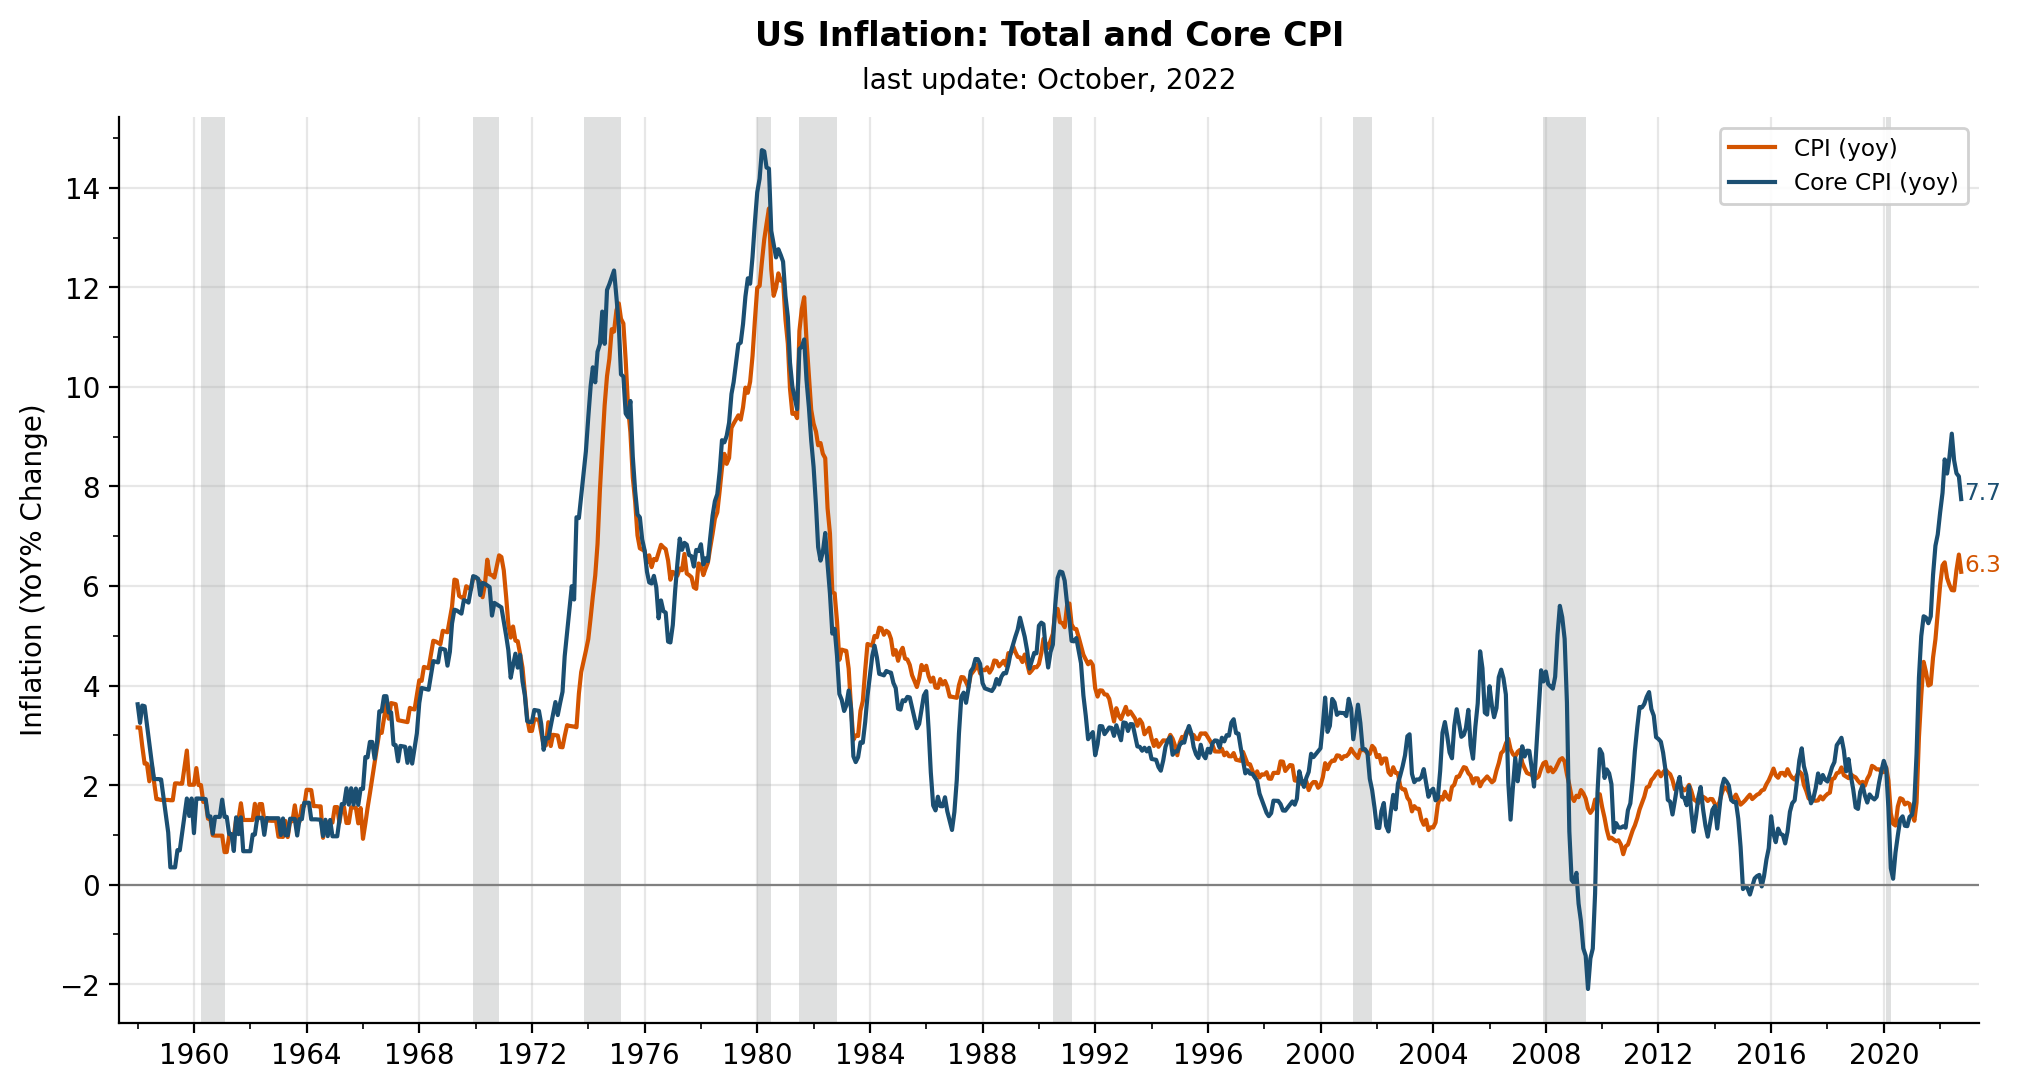

In [14]:
# setting a better quality display.
plt.rcParams['figure.dpi'] = 200

# Mapping series to series names.
hue_colors = {"CPI (yoy)":colors[0],"Core CPI (yoy)":colors[1]}

# starting plot
fig, ax = plt.subplots(figsize=(12,6))

# line plot using seaborn. The advantage of seaborn is that 
# we can change line colors according to the series name, allowing us to use data in long format.

sns.lineplot(data=df_yoy[df_yoy["date"]>="1958"], # filter date
            x="date", y="value",
            hue="series_id", palette=hue_colors, ax=ax, legend=False)

# Automated annotations:
# creating df with last observation of data
last = df_yoy.loc[df_yoy['date']==max(df_yoy['date']),:]

# Plotting last series value:
ax.annotate(text = round(last.loc[last["series_id"]=="CPI (yoy)","value"].values[0],1),
            xy=
            (last.loc[last["series_id"]=="CPI (yoy)","date"],
             last.loc[last["series_id"]=="CPI (yoy)","value"]), 
            xycoords="data", xytext=(1, 0), textcoords="offset points",
            color=hue_colors["CPI (yoy)"], size='small')

ax.annotate(text = round(last.loc[last["series_id"]=="Core CPI (yoy)","value"].values[0],1),
            xy=(last.loc[last["series_id"]=="Core CPI (yoy)","date"],
                last.loc[last["series_id"]=="Core CPI (yoy)","value"]), 
            xycoords="data", xytext=(1, 0), textcoords="offset points",
            color=hue_colors["Core CPI (yoy)"], size='small')

# adding legend
ax.legend(['CPI (yoy)', 'Core CPI (yoy)'], 
    loc='upper right', frameon=True, framealpha=0.9, fontsize='small')

# Creating recessions df:
recessions = pd.DataFrame({
        'start': ['1948-11-01', '1953-07-01', '1957-08-01', '1960-04-01', 
                  '1969-12-01', '1973-11-01', '1980-01-01', 
        '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01', '2020-02-01'],
        'end': ['1949-10-01', '1954-05-01', '1958-04-01', '1961-02-01', 
                '1970-11-01', '1975-03-01', '1980-07-01', 
        '1982-11-01', '1991-03-01', '2001-11-01', '2009-06-01', '2020-04-01']
    })

recessions["start"] = pd.to_datetime(recessions["start"])
recessions["end"] = pd.to_datetime(recessions["end"])

recessions = recessions[recessions["start"]>="1958"]

# plotting recessions
for i in range(recessions.shape[0]):
    ax.axvspan(recessions.iloc[i]["start"],
               recessions.iloc[i]["end"], ec=None, color=colors[100], alpha=0.2)

# adding gray line at zero:
ax.axhline(y=0, color='gray', lw=0.8)

# 1% margin at date axis, and 4% in y axis:
ax.margins(x=0.01, y=0.04)

# y axis
ax.set_ylabel('Inflation (YoY% Change)', size='medium')
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# date axis
ax.xaxis.set_minor_locator(mdates.YearLocator(2))
ax.xaxis.set_major_locator(mdates.YearLocator(4))

# dropping top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['top'].set_edgecolor(colors[107])
#ax.spines['right'].set_edgecolor(colors[107])

# grid lines
ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', alpha=0.3)

# adding title
ax.set_title('US Inflation: Total and Core CPI', y=1.06, loc="center",
            fontweight="bold")

# subtitle (improvising here)
# With a lot of data sources,
# plotting the last observation date is a good way to check if everything is being updated.
ax.xaxis.set_label_position('top')
text = last.loc[last["series_id"]=="CPI (yoy)",:]["date"].dt.strftime("%B, %Y").values[0]
ax.set_xlabel(f"last update: {text}",labelpad = 10, loc="center")

plt.show()

since the idea is to use data in a similar format to make different charts, it makes sense to create a function to make this task easier.

In [15]:
def ts_plot(df, df_map, start_date, title, ylab,
            fig_size = (12,6), legend_loc = "upper left",
            plot_recession = True, plot_zero = True,
            xmargin = 0.01, ymargin = 0.04,
            y_major_loc = 2, y_minor_loc = 2,
            x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n = 0):
    """
    Time Series Plot that consumes a DataFrame in the long format, with
    columns series_id, date and value.
    ----
    Params:
        df: The long format pandas dataframe.
        df_map: data frame with series id, color code,
                alpha [0,1] and annotation (True or False).
        start_date: [str] date the chart should start.
        title: [str] chart title.
        ylab: [str] y axis title.
        n: [int] additional space (in days) at the right side of the chart.
        plot_recession: [Boolean] plot recessions? defalt is true
        plot_zero: [Boolean] plot horizontal line at y=0? defalt is true.
        x_margin: [int] horizontal axis margin
        y_margin: [int] vertical axis margin
        y_major_loc: [int] controls number of major tick marks in Y axis
        y_minor_loc: [int] equal two (2) to place one minor ticker between major tickers.
        x_major_loc: [int] controls number of major tick marks in X axis
        x_minor_loc: [int] equal two (2) to place one minor ticker between major tickers.
        x_format = [str] date display format. defalt = "%Y"
             
        
    ----
    Returns:
        figure and axes objects.
    """
    
    # starting plot
    fig, ax = plt.subplots(figsize = fig_size)
    
    # filter date
    df = df[df["date"] >= start_date]
        
    # last observation
    last = df.groupby("series_id")["date"].max().reset_index()
    last = pd.merge(last,df,how="left", on=["series_id","date"])
    
    # line plot using seaborn and annotation
    for i in range(len(df_map)):
    
        sns.lineplot(
            data=df[df["series_id"]==df_map.loc[i][0]], #filter series
            x="date", y="value",
            color=df_map.loc[i][1], # map color
            alpha = df_map.loc[i][2], # map alpha
            ax=ax, legend=False)
    
        if df_map.loc[i][3] == True:
            ax.annotate(text = round(last.loc[last["series_id"] == df_map.loc[i][0], "value"].values[0],1),
                        xy = (last.loc[last["series_id"] == df_map.loc[i][0], "date"],
                              last.loc[last["series_id"] == df_map.loc[i][0], "value"]),
                        xycoords = "data", xytext = (1,0), textcoords="offset points",
                        color = df_map.loc[i][1], alpha = df_map.loc[i][2],
                        size='small', stretch="ultra-expanded",weight="semibold")
    
    # adding legend
    ax.legend(list(df_map["series_id"].values), 
        loc= legend_loc, frameon=True, framealpha=0.9, fontsize='small')
    
    # plotting recessions
    if plot_recession == True:
        
        recessions = pd.DataFrame({
                'start': ['1948-11-01', '1953-07-01', '1957-08-01', '1960-04-01', '1969-12-01', '1973-11-01', '1980-01-01', 
                '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01', '2020-02-01'],
                'end': ['1949-10-01', '1954-05-01', '1958-04-01', '1961-02-01', '1970-11-01', '1975-03-01', '1980-07-01', 
                '1982-11-01', '1991-03-01', '2001-11-01', '2009-06-01', '2020-06-01']
            })
        
        recessions["start"] = pd.to_datetime(recessions["start"])
        recessions["end"] = pd.to_datetime(recessions["end"])
        
        recessions = recessions[recessions["start"]>=start_date]
        
        # plotting
        for i in range(recessions.shape[0]):
            ax.axvspan(recessions.iloc[i]["start"], recessions.iloc[i]["end"],
                       ec=None, color=colors[100], alpha=0.3)
    
    if plot_zero == True:
        
        # adding gray line at zero:
        ax.axhline(y=0, color='gray', lw=0.8)
    
    # 1% margin at date axis, and 4% in y axis:
    ax.margins(x=xmargin, y=ymargin)
    
    # y axis
    ax.set_ylabel(ylab, size='medium')
    ax.yaxis.set_major_locator(MultipleLocator(y_major_loc))
    ax.yaxis.set_minor_locator(AutoMinorLocator(y_minor_loc))
    
    # date axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=x_major_loc))
    ax.xaxis.set_minor_locator(AutoMinorLocator(x_minor_loc))
    
    year_month_formatter = mdates.DateFormatter(x_format)
    ax.xaxis.set_major_formatter(year_month_formatter)
    
    # dropping top and right spines.
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.spines['top'].set_edgecolor(colors[107])
    ax.spines['right'].set_edgecolor(colors[107])

    # grid lines
    ax.grid(axis='y', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
    
    # adjusting x axis limits
    ax.set_xlim([pd.to_datetime(start_date),pd.to_datetime(df["date"].max()) + pd.Timedelta(days=n)])
    
    # adding title
    ax.set_title(title, y=1.05, loc="center",
                fontweight="bold")
    
    # subtitle (Improvising here)
    # With a lot of data sources,
    # plotting the last observation date is a good way to check if everything is being updated.
    ax.xaxis.set_label_position('top')
    sub = last["date"].dt.strftime("%B, %Y").max()
    ax.set_xlabel(f"last update: {sub}",labelpad = 8, loc="center")
    
    return fig, ax


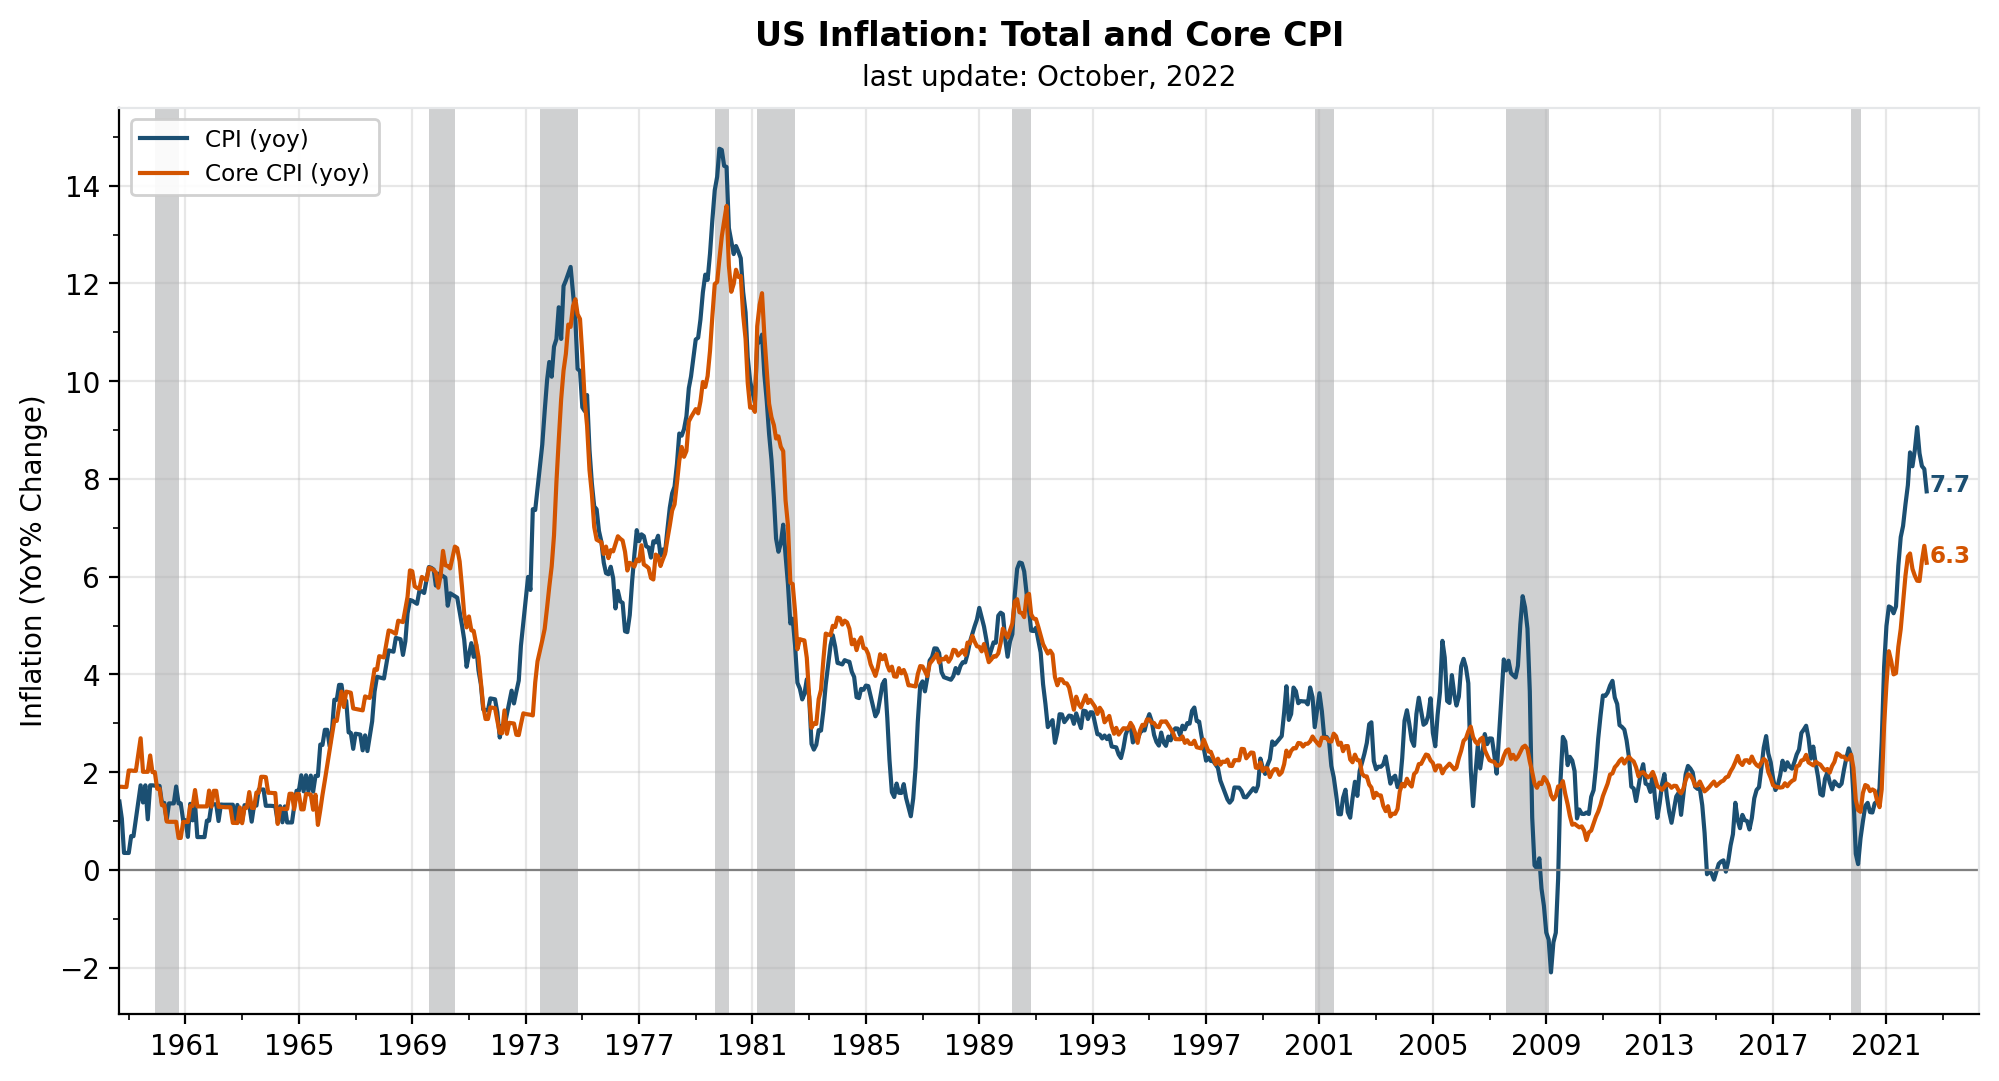

In [16]:
# testing function:
#plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ['CPI (yoy)','Core CPI (yoy)'],
    'hue': [colors[0], colors[1]],
    'alpha':[1, 1],
    'annotation':[True, True]})

# running function
fig, ax = ts_plot(df = df_yoy,
                  df_map = df_code,
                  start_date = "1959-01-01",
                  title ='US Inflation: Total and Core CPI',
                  ylab='Inflation (YoY% Change)',
                  fig_size = (12,6), legend_loc = "upper left",
                  plot_recession = True, plot_zero = True,
                  xmargin = 0.00, ymargin = 0.05,
                  y_major_loc = 2, y_minor_loc = 2,
                  x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n=680)

plt.show()


## Three Months Seasonally Adjusted Annual Rate (3MSAAR)

We need:

- Seasonally adjusted series for CPI and Core CPI
- Calculate the 3M Seasonal Adjusted Annual Rate
- Merge data with df
- plot

In [17]:
# getting the data:
(metadata[
    (metadata["item_name"].isin(["All items","All items less food and energy"])) &
    (metadata["seasonal"] == "S")
    ]
)

,series_id,item_code,item_name,display_level,seasonal,series_title,base_period,begin_period,begin_year,end_period,end_year
0,CUSR0000SA0,SA0,All items,0,S,"All items in U.S. city average, all urban cons...",1982-84=100,M01,1947,M10,2022
6,CUSR0000SA0L1E,SA0L1E,All items less food and energy,1,S,All items less food and energy in U.S. city av...,1982-84=100,M01,1957,M10,2022


In [18]:
# CPI SA: CUSR0000SA0
# Core CPI: CUSR0000SA0L1E

# now, we select them in our data
df_saar = cpi[cpi["series_id"].isin(["CUSR0000SA0", "CUSR0000SA0L1E"])].copy().reset_index()
df_saar.sort_values("date").head()

,index,series_id,date,value
0,0,CUSR0000SA0,1947-01-01,21.48
1,1,CUSR0000SA0,1947-02-01,21.62
2,2,CUSR0000SA0,1947-03-01,22.00
3,3,CUSR0000SA0,1947-04-01,22.00
4,4,CUSR0000SA0,1947-05-01,21.95


In [19]:
def saar(x, n, dt = "date", series="series_id", value = "value"):
    """
    Calculates monthly annual rate changes
    ---
    paramns:
        x: pandas dataframe with date, series id and values columns
        n: [int] Number of months
        dt: [str] dates column name
        series: [str] series_id column name
        value: [str] values column name
    
    returns: pandas series with yoy changes by group.
    """
    x = (x
         .sort_values(dt)
         .set_index(dt)
         .groupby(series)[value]
         .rolling(n)
         .mean()
         .dropna()
         .reset_index())
    
    x = (x
         .sort_values(dt)
         .set_index([dt, series])
         .groupby(pd.Grouper(level = series))[value]
         .pct_change(periods = n)
         .dropna()
         .reset_index()
         .eval(f"{value} = {value}+1")
         .eval(f"{value} = ({value}**{12/n} -1) * 100"))
      
    return x


In [20]:
df_saar = saar(df_saar, n = 3).replace(["CUSR0000SA0","CUSR0000SA0L1E"],["CPI (3MSaar)", "Core CPI (3MSaar)"])
df_saar.head()

,date,series_id,value
0,1947-06-01,CPI (3MSaar),5.837905
1,1947-07-01,CPI (3MSaar),3.958696
2,1947-08-01,CPI (3MSaar),4.689847
3,1947-09-01,CPI (3MSaar),9.012839
4,1947-10-01,CPI (3MSaar),11.907119


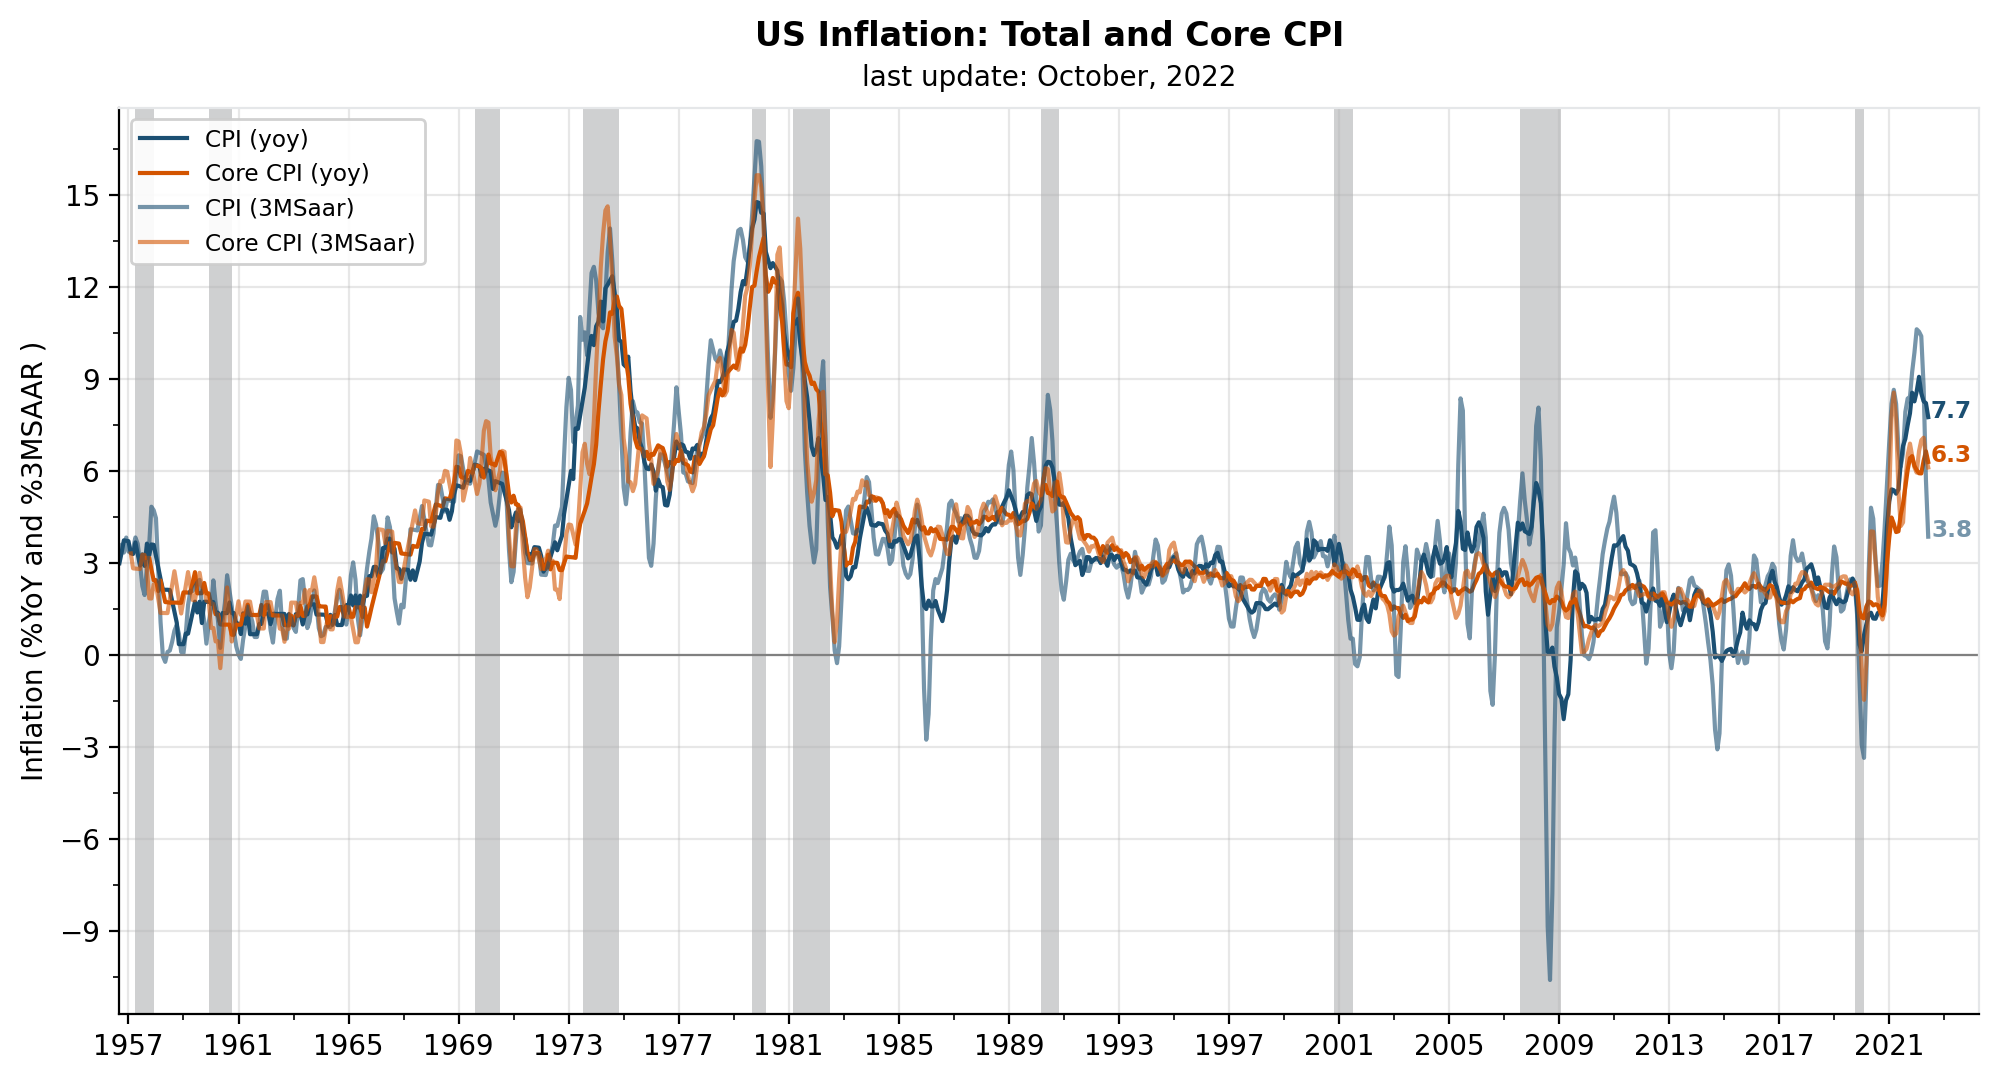

In [21]:
# testing function:
#plt.rcParams['figure.dpi'] = 200

df_code = pd.DataFrame({
    'series_id': ['CPI (yoy)','Core CPI (yoy)','CPI (3MSaar)','Core CPI (3MSaar)'],
    'hue': [colors[0], colors[1], colors[0], colors[1]],
    'alpha':[1, 1, 0.6, 0.6],
    'annotation':[True, True, True, False]})

fig, ax = ts_plot(df = pd.concat([df_yoy, df_saar]),
                  df_map = df_code,
                  start_date = "1957-01-01",
                  title ='US Inflation: Total and Core CPI',
                  ylab='Inflation (%YoY and %3MSAAR )',
                  plot_recession = True, plot_zero = True,
                  xmargin = 0.01, ymargin = 0.04,
                  y_major_loc = 3, y_minor_loc = 2,
                  x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n=680)

plt.show()

## Composition Charts

For contribution charts, we need to combine the CPI data with the relative importance (weights) of each item.

Total CPI can be split between: Energy, Food and Core

In [22]:
headline_contr = weights[weights["item_name"].isin(["Food","Energy","All items less food and energy"])]
headline_contr.sort_values(["item_name","date"]).head()

,item_name,date,weight
18,All items less food and energy,2012-03-01,75.722
55,All items less food and energy,2012-04-01,75.438
92,All items less food and energy,2012-05-01,75.398
129,All items less food and energy,2012-06-01,75.585
166,All items less food and energy,2012-07-01,75.787


In [23]:
# we need to check if the item names are the same:
metadata[(metadata.item_name.isin(["Food","Energy","All items less food and energy"])) &
         (metadata.seasonal == "U")]
# good

,series_id,item_code,item_name,display_level,seasonal,series_title,base_period,begin_period,begin_year,end_period,end_year
321,CUUR0000SA0E,SA0E,Energy,1,U,"Energy in U.S. city average, all urban consume...",1982-84=100,M01,1957,M10,2022
326,CUUR0000SA0L1E,SA0L1E,All items less food and energy,1,U,All items less food and energy in U.S. city av...,1982-84=100,M01,1957,M10,2022
349,CUUR0000SAF1,SAF1,Food,1,U,"Food in U.S. city average, all urban consumers...",1982-84=100,M01,1913,M10,2022


In [24]:
# merge with series id
headline_contr = (
    pd.merge(
        headline_contr,
        metadata[metadata["seasonal"]=="U"][["series_id","item_name"]],
        how="left", on = ["item_name"])
)

# weights, 12m moving averages
headline_contr["weight"] = (
    headline_contr
    .sort_values("date")
    .groupby('series_id')['weight']
    .transform(lambda x: x.rolling(12,min_periods=1).mean())
) 

headline_contr = headline_contr.dropna()
headline_contr.head()

,item_name,date,weight,series_id
0,Food,2012-03-01,14.2550,CUUR0000SAF1
1,Energy,2012-03-01,10.0220,CUUR0000SA0E
2,All items less food and energy,2012-03-01,75.7220,CUUR0000SA0L1E
3,Food,2012-04-01,14.2110,CUUR0000SAF1
4,Energy,2012-04-01,10.2085,CUUR0000SA0E


In [25]:
# getting cpi data
# computing yoy changes
# merge result with df
headline_contr = (
    pd.merge(headline_contr,
             compute_change(
                 cpi[cpi["series_id"].isin(["CUUR0000SAF1","CUUR0000SA0E","CUUR0000SA0L1E"])],
                 n = 12),
             how="left", on=["date","series_id"])
)

headline_contr.head()

,item_name,date,weight,series_id,value
0,Food,2012-03-01,14.2550,CUUR0000SAF1,3.302418
1,Energy,2012-03-01,10.0220,CUUR0000SA0E,4.570008
2,All items less food and energy,2012-03-01,75.7220,CUUR0000SA0L1E,2.255353
3,Food,2012-04-01,14.2110,CUUR0000SAF1,3.132434
4,Energy,2012-04-01,10.2085,CUUR0000SA0E,0.884041


In [26]:
# calculating contribution
headline_contr["value"] = (headline_contr["weight"]/100) * headline_contr["value"]
headline_contr["item_name"] = headline_contr["item_name"].replace("All items less food and energy","Core")
headline_contr.head()

,item_name,date,weight,series_id,value
0,Food,2012-03-01,14.2550,CUUR0000SAF1,0.470760
1,Energy,2012-03-01,10.0220,CUUR0000SA0E,0.458006
2,Core,2012-03-01,75.7220,CUUR0000SA0L1E,1.707799
3,Food,2012-04-01,14.2110,CUUR0000SAF1,0.445150
4,Energy,2012-04-01,10.2085,CUUR0000SA0E,0.090247


In [27]:
# reshaping data:
headline_contr = (
    pd.pivot_table(
        headline_contr[["date","item_name","value"]],
        values="value", columns="item_name", index="date")
    .reset_index()
    .rename_axis(None,axis=1)
)

headline_contr.head()

,date,Core,Energy,Food
0,2012-03-01,1.707799,0.458006,0.470760
1,2012-04-01,1.748553,0.090247,0.445150
2,2012-05-01,1.704561,-0.397938,0.397828
3,2012-06-01,1.675355,-0.404467,0.387053
4,2012-07-01,1.587493,-0.513404,0.330292


In [28]:
test = headline_contr.copy()
test = test[["date","Core","Food","Energy"]]

yoy = df_yoy.loc[df_yoy["series_id"]=="CPI (yoy)",["series_id","date","value"]]
yoy = yoy[yoy["date"]>="2012-03-01"]

# test_positive
test_positive = test.copy()
test_positive.loc[test_positive["Core"] < 0 ,"Core"] = 0
test_positive.loc[test_positive["Food"] < 0 ,"Food"] = 0
test_positive.loc[test_positive["Energy"] < 0 ,"Energy"] = 0

# test_negative
test_negative = test.copy()
test_negative.loc[test_negative["Core"] >= 0 ,"Core"] = 0
test_negative.loc[test_negative["Food"] >= 0 ,"Food"] = 0
test_negative.loc[test_negative["Energy"] >= 0 ,"Energy"] = 0

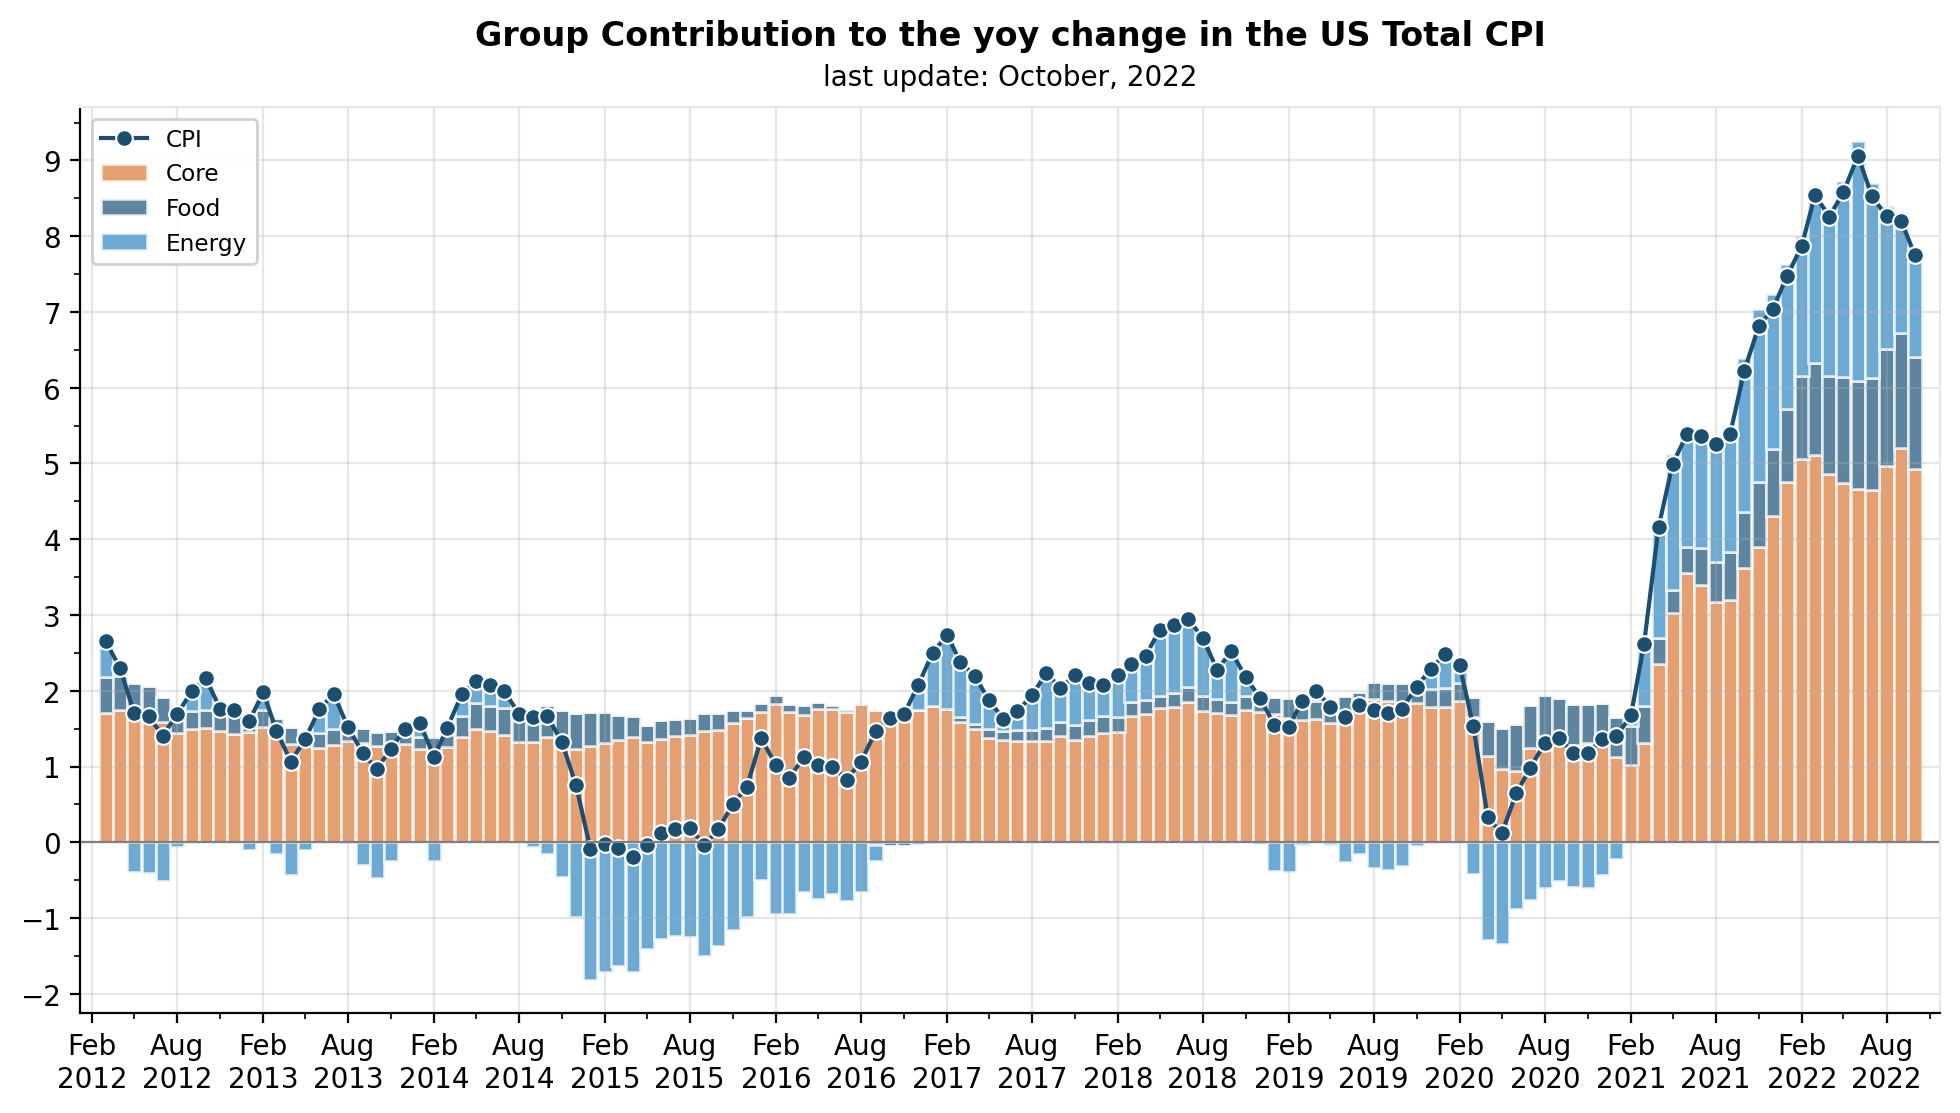

In [29]:
# chart:
#plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(12,6))

# positive values
ax.bar(test_positive["date"], test_positive["Core"], width = 30, label="Core", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(test_positive["date"], test_positive["Food"], width = 30,
       bottom = test_positive["Core"], label="Food", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(test_positive["date"], test_positive["Energy"], width = 30,
       bottom = test_positive["Food"]+test_positive["Core"], label="Energy", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# negative values
ax.bar(test_negative["date"], test_negative["Core"], width = 30, label="Core", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(test_negative["date"], test_negative["Food"], width = 30,
       bottom = test_negative["Core"], label="Food", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(test_negative["date"], test_negative["Energy"], width = 30,
       bottom = test_negative["Food"]+test_negative["Core"], label="Energy", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# line
sns.lineplot(data=yoy,
            x="date", y="value",
            color=colors[0], ax=ax, legend=False, marker="o")

ax.legend(['CPI', 'Core','Food', 'Energy'], 
    loc='upper left', frameon=True, framealpha=0.9, fontsize='small')

ax.axhline(y=0, color='gray', lw=0.8, label = "_line")

ax.margins(x=0.01, y=0.04)

# date axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

year_month_formatter = mdates.DateFormatter("%b\n%Y")
ax.xaxis.set_major_formatter(year_month_formatter)

# y axis
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel(None)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_edgecolor(colors[107])
ax.spines['right'].set_edgecolor(colors[107])

ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', alpha=0.3)

ax.set_title('Group Contribution to the yoy change in the US Total CPI', y=1.05, loc="center",
            fontweight="bold")

# subtitle...
last = test_positive.loc[test_positive['date']==max(test_positive['date']),:]

ax.xaxis.set_label_position('top')
text = last["date"].dt.strftime("%B, %Y").values[0]

ax.set_xlabel(f"last update: {text}",
              labelpad = 8, loc="center")

plt.show()

## Two y-axis Plot

**Gas Price and Total CPI**

In [30]:
# importing gasoline prices:
gas = pd.read_parquet("data\\inflation\\data_fred_gasprice.parquet")
gas.head()

,series_id,date,value,series_name,unit,seasonal
0,GASREGW,1990-08-20,1.191,US Weekly Gas Price,Dollars per Gallon,U
1,GASREGW,1990-08-27,1.245,US Weekly Gas Price,Dollars per Gallon,U
2,GASREGW,1990-09-03,1.242,US Weekly Gas Price,Dollars per Gallon,U
3,GASREGW,1990-09-10,1.252,US Weekly Gas Price,Dollars per Gallon,U
4,GASREGW,1990-09-17,1.266,US Weekly Gas Price,Dollars per Gallon,U


In [31]:
# yoy
# first, 4w moving averages
gas['value'] = (gas
                .sort_values("date")
                .groupby('series_id')["value"]
                .transform(lambda x: x.rolling(4).mean()))
gas = gas.dropna()
gas = compute_change(gas[["series_id","date","value"]], n=52)

gas = gas[gas["date"]>="1996"]

# cpi yoy:
yoy = df_yoy.loc[df_yoy["series_id"]=="CPI (yoy)",["series_id","date","value"]]
yoy = yoy[yoy["date"]>="1996"]
yoy["date"] = yoy["date"] + pd.DateOffset(months=1)
yoy["date"] = yoy["date"] - pd.Timedelta(days=1)
yoy.head()

,series_id,date,value
1440,CPI (yoy),1996-01-31,2.727878
1442,CPI (yoy),1996-02-29,2.650762
1444,CPI (yoy),1996-03-31,2.840159
1446,CPI (yoy),1996-04-30,2.896643
1449,CPI (yoy),1996-05-31,2.890933


First, doing the chart step-by-step

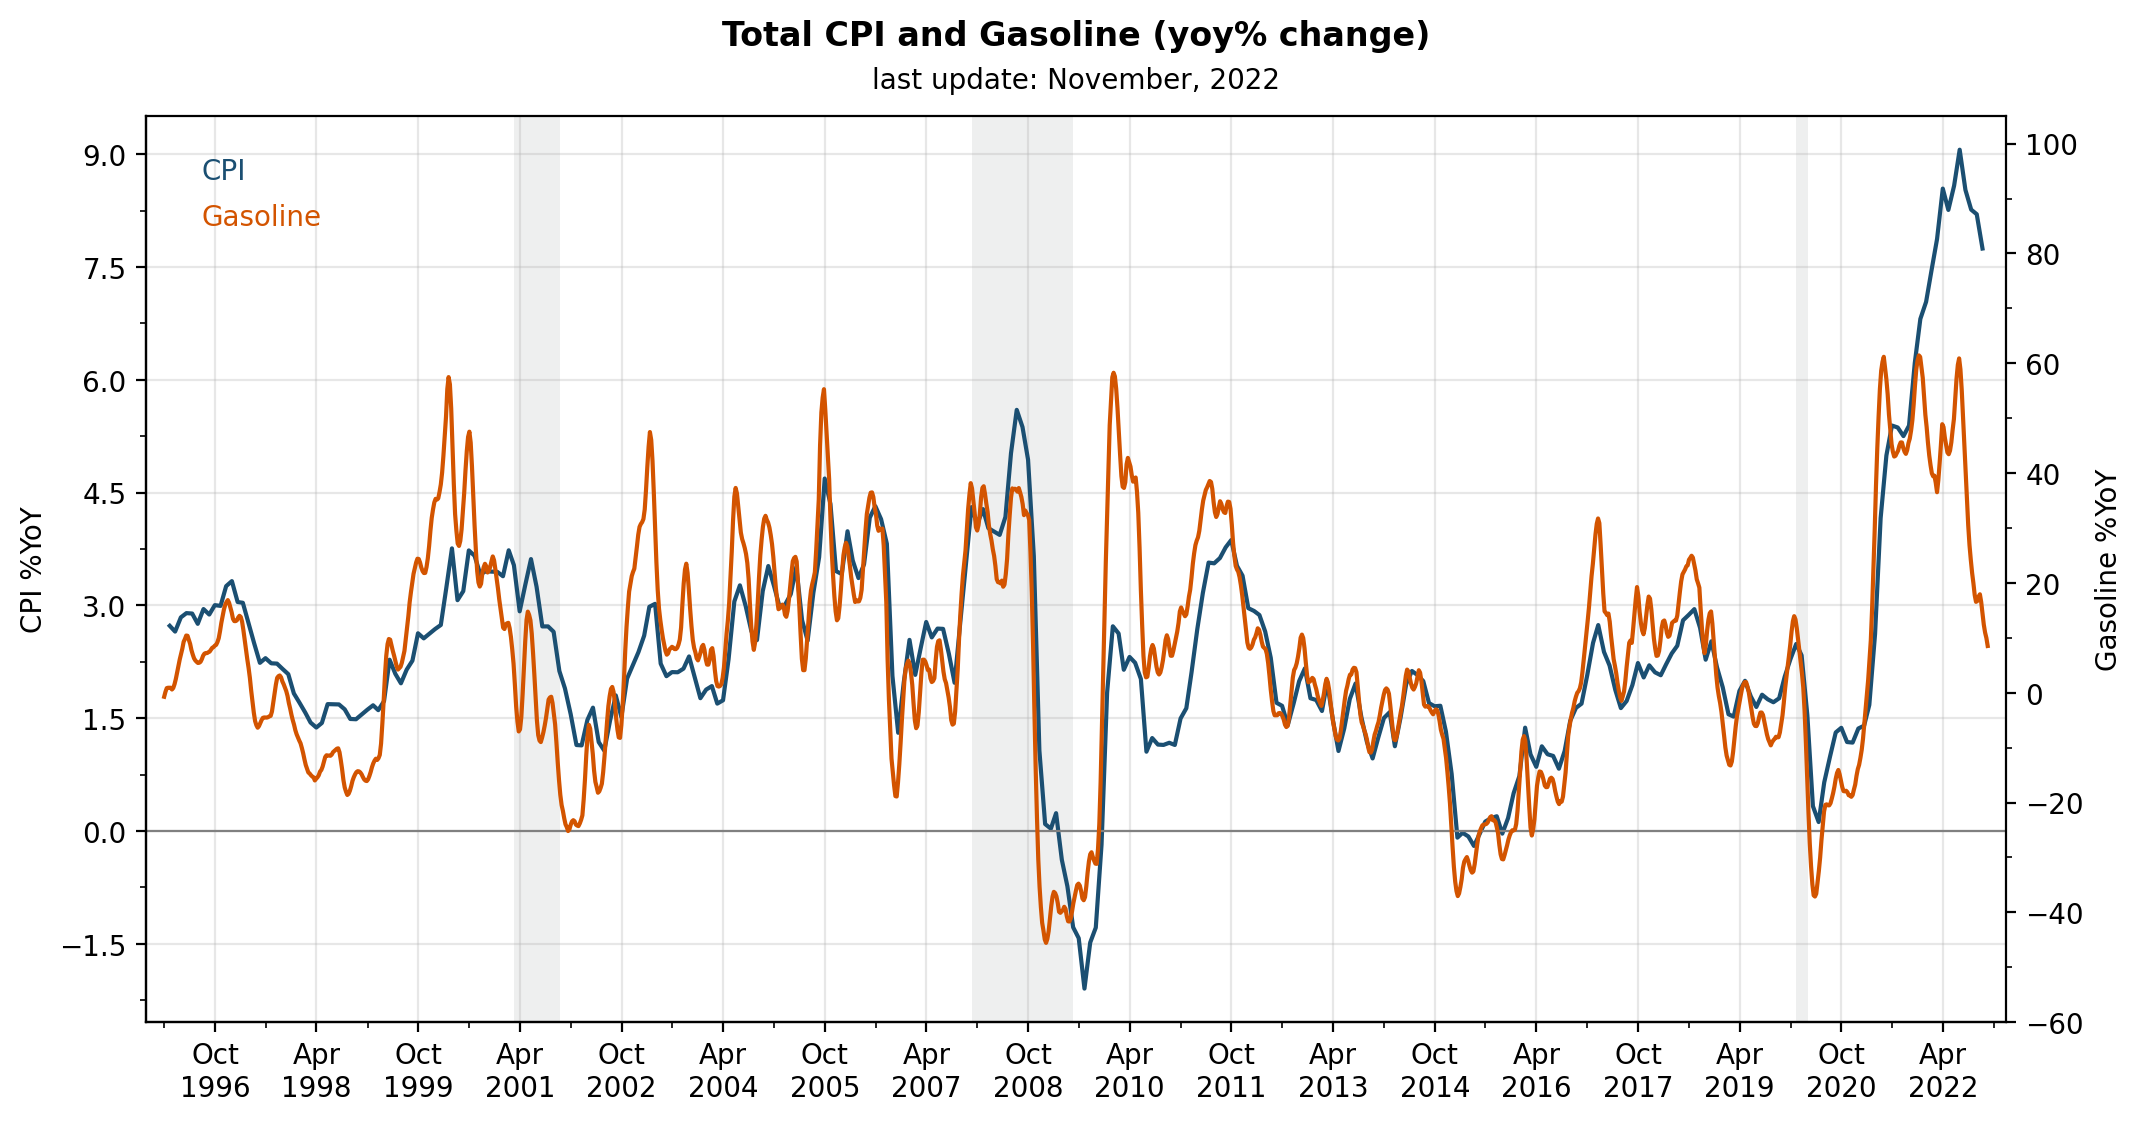

In [32]:
# chart:
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=yoy,
            x="date", y="value",
            color=colors[0], ax=ax, legend=False)

ax2 = ax.twinx()

sns.lineplot(data=gas,
            x="date", y="value", color=colors[1], ax=ax2, legend=False)

ax2.set_ylim(-60, 105)

ax.margins(x=0.01, y=0.04)

# date axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=18))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=9))

year_month_formatter = mdates.DateFormatter("%b\n%Y")
ax.xaxis.set_major_formatter(year_month_formatter)

# y axis
ax.yaxis.set_major_locator(MultipleLocator(1.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.set_ylabel("CPI %YoY")
ax2.set_ylabel("Gasoline %YoY")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', alpha=0.3)

# recessions:
recessions = pd.DataFrame({
        'start': ['1948-11-01', '1953-07-01', '1957-08-01', '1960-04-01', '1969-12-01', '1973-11-01', '1980-01-01', 
        '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01', '2020-02-01'],
        'end': ['1949-10-01', '1954-05-01', '1958-04-01', '1961-02-01', '1970-11-01', '1975-03-01', '1980-07-01', 
        '1982-11-01', '1991-03-01', '2001-11-01', '2009-06-01', '2020-04-01']
    })

recessions["start"] = pd.to_datetime(recessions["start"])
recessions["end"] = pd.to_datetime(recessions["end"])

recessions = recessions[recessions["start"]>="1996"]

for i in range(recessions.shape[0]):
    ax.axvspan(recessions.iloc[i]["start"], recessions.iloc[i]["end"], ec=None, color=colors[100], alpha=0.1)

ax.axhline(y=0, color='gray', lw=0.8)

ax.annotate("CPI", xy = (0.03, 0.93), xytext = (0, 0),
            xycoords="axes fraction", textcoords="offset points", color = colors[0], weight = 530)

ax.annotate("Gasoline", xy = (0.03, 0.88), xytext = (0, 0),
            xycoords="axes fraction", textcoords="offset points", color = colors[1], weight = 530)

ax.set_title('Total CPI and Gasoline (yoy% change)', y=1.06, loc="center",
            fontweight="bold")

# subtitle...
last = gas.loc[gas['date']==max(gas['date']),:]

ax.xaxis.set_label_position('top')
text = last["date"].dt.strftime("%B, %Y").values[0]

ax.set_xlabel(f"last update: {text}",
              labelpad = 10, loc="center")

plt.show()

Now, building the dual y-axis function

In [34]:
def dual_ts_plot(df, series1, series2, start_date, title, ly_label, ry_label,
                 fig_size = (12,6), legend_loc = "upper left",
                 plot_recession = True, plot_zero = True,
                 xmargin = 0.01, ymargin = 0.04,
                 y_major_loc = 2, y_minor_loc = 2,
                 x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n = 0):
    """
    Time Series Plot that consumes a DataFrame in the long format, with
    columns series_id, date and value.
    ----
    Params:
        df: The long format pandas dataframe.
        series1: [str] series id of data on the left axis
        series2: [str] series id of data on the right axis
        start_date: [str] date the chart should start.
        title: [str] chart title.
        ly_label: [str] left y axis title.
        ry_label: [str] right y axis title.
        n: [int] additional space (in days) at the right side of the chart.
        plot_recession: [Boolean] plot recessions? defalt is true
        plot_zero: [Boolean] plot horizontal line on y=0? defalt is true.
        x_margin: [int] horizontal axis margin
        y_margin: [int] vertical axis margin
        y_major_loc: [int] controls number of major tick marks in Y axis
        y_minor_loc: [int] equal two (2) to place one minor ticker between major tickers.
        x_major_loc: [int] controls number of major tick marks in X axis
        x_minor_loc: [int] equal two (2) to place one minor ticker between major tickers.
        x_format = [str] date display format. defalt = "%Y"
             
        
    ----
    Returns:
        figure and axes objects.
    """
    
    # starting plot
    fig, ax = plt.subplots(figsize = fig_size)
    
    # filter date
    df = df[df["date"] >= start_date]
        
    # inside the function:
    data1 = df[df["series_id"]==series1].copy()
    data2 = df[df["series_id"]==series2].copy()
    
    mean1 = np.mean(data1["value"])
    sd1 = np.std(data1["value"])
    
    mean2 = np.mean(data2["value"])
    sd2 = np.std(data2["value"])
    
    data2["value"] = ((data2["value"] - mean2)/sd2)*sd1 + mean1
    
    # line plot using seaborn
    sns.lineplot(data=data1,
                 x="date", y="value",
                 color=colors[0], ax=ax, legend=False)
    
    sns.lineplot(data=data2,
                 x="date", y="value", color=colors[1], ax=ax, legend=False)
    
    ax2 = ax.twinx()
    
    y1, y2 = ax.get_ylim()
    ax2.set_ylim(sd2*((y1-mean1)/sd1)+mean2, sd2*((y2-mean1)/sd1)+mean2)
        
    # adding legend
    ax.legend([ly_label, ry_label],
              loc= legend_loc, frameon=True, framealpha=0.9, fontsize='small')
    
    # plotting recessions
    if plot_recession == True:
        
        recessions = pd.DataFrame({
                'start': ['1948-11-01', '1953-07-01', '1957-08-01', '1960-04-01',
                          '1969-12-01', '1973-11-01', '1980-01-01', 
                '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01', '2020-02-01'],
                'end': ['1949-10-01', '1954-05-01', '1958-04-01', '1961-02-01',
                        '1970-11-01', '1975-03-01', '1980-07-01', 
                '1982-11-01', '1991-03-01', '2001-11-01', '2009-06-01', '2020-06-01']
            })
        
        recessions["start"] = pd.to_datetime(recessions["start"])
        recessions["end"] = pd.to_datetime(recessions["end"])
        
        recessions = recessions[recessions["start"]>=start_date]
        
        # plotting
        for i in range(recessions.shape[0]):
            ax.axvspan(recessions.iloc[i]["start"], recessions.iloc[i]["end"],
                       ec=None, color=colors[100], alpha=0.3)
    
    if plot_zero == True:
        
        # adding gray line at zero:
        ax.axhline(y=0, color='gray', lw=0.8)
    
    # 1% margin at date axis, and 4% in y axis:
    ax.margins(x=xmargin, y=ymargin)
    
    # y axis
    ax.set_ylabel(ly_label, size='medium')
    ax.yaxis.set_major_locator(MultipleLocator(y_major_loc))
    ax.yaxis.set_minor_locator(AutoMinorLocator(y_minor_loc))
    ax2.set_ylabel(ry_label, size='medium')
    
    # date axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=x_major_loc))
    ax.xaxis.set_minor_locator(AutoMinorLocator(x_minor_loc))
    
    year_month_formatter = mdates.DateFormatter(x_format)
    ax.xaxis.set_major_formatter(year_month_formatter)
    
    # dropping top and right spines.
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.spines['top'].set_edgecolor(colors[107])
    ax2.spines['top'].set_edgecolor(colors[107])

    # grid lines
    ax.grid(axis='y', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
    
    # adjusting x axis limits
    ax.set_xlim([pd.to_datetime(start_date), pd.to_datetime(df["date"].max()) + pd.Timedelta(days=n)])
    
    # adding title
    ax.set_title(title, y=1.05, loc="center",
                fontweight="bold")
    
    # subtitle (Improvising here)
    # With a lot of data sources,
    # plotting the last observation date is a good way to check if everything is being updated.
    ax.xaxis.set_label_position('top')
    sub = df["date"].max().strftime("%B, %Y")
    ax.set_xlabel(f"last update: {sub}", labelpad = 8, loc="center")
    
    return fig, ax



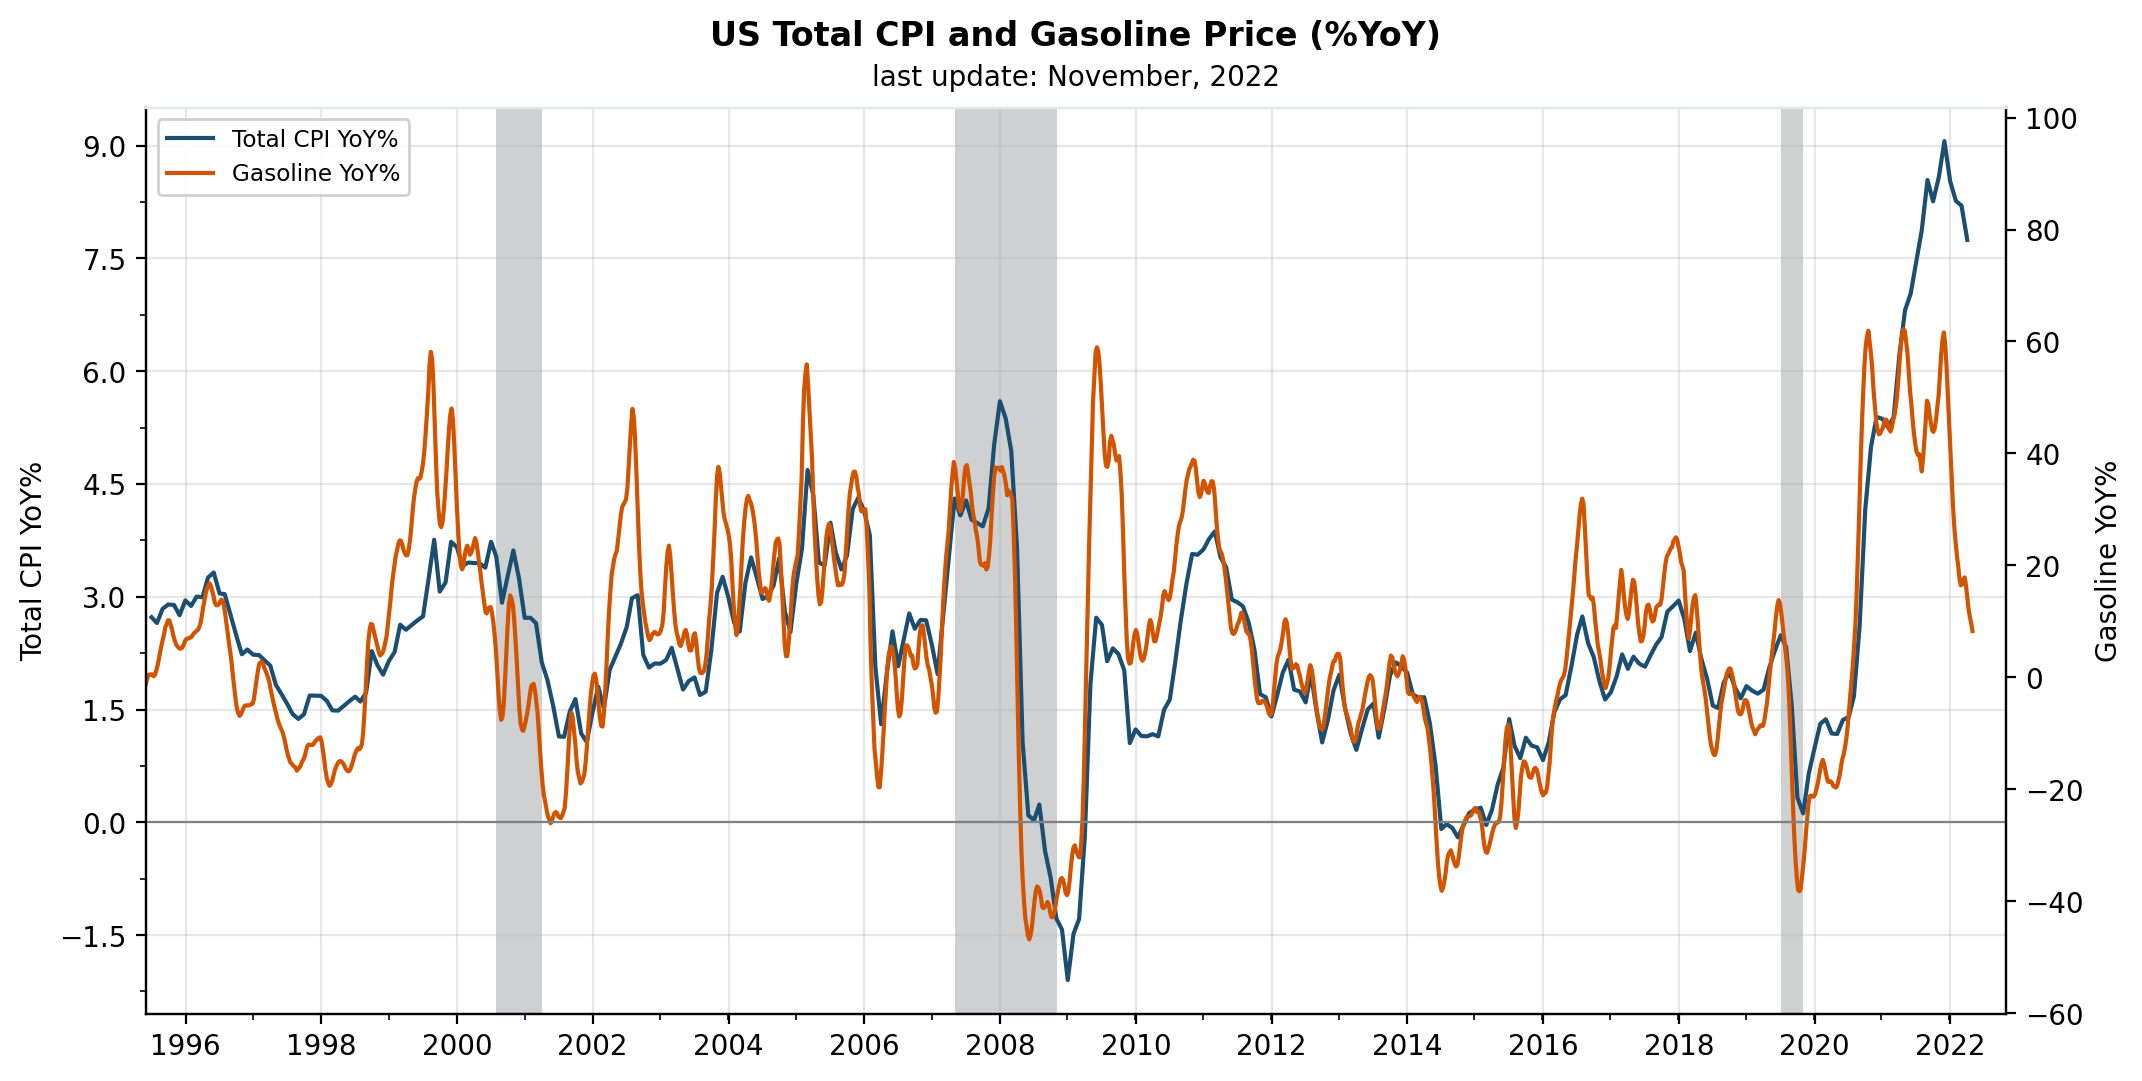

In [35]:
fig, ax = dual_ts_plot(df = pd.concat([yoy, gas]),
                       series1 = "CPI (yoy)", series2 = "GASREGW",
                       start_date = "1996-01-01",
                       title = "US Total CPI and Gasoline Price (%YoY)",
                       ly_label = "Total CPI YoY%",
                       ry_label = "Gasoline YoY%",
                       fig_size = (12,6), legend_loc = "upper left",
                       plot_recession = True, plot_zero = True,
                       xmargin = 0.01, ymargin = 0.04,
                       y_major_loc = 1.5, y_minor_loc = 2,
                       x_major_loc = 24, x_minor_loc = 2, x_format = "%Y", n = 180)

plt.show()

## Core CPI

The core inflation is divided in Goods and Services:

In [36]:
# selecting data:
# getting the data:
(metadata[
    (metadata["item_name"].isin(["Commodities less food and energy commodities",
                                 "Services less energy services"]))
    ]
)

,series_id,item_code,item_name,display_level,seasonal,series_title,base_period,begin_period,begin_year,end_period,end_year
18,CUSR0000SACL1E,SACL1E,Commodities less food and energy commodities,1,S,Commodities less food and energy commodities i...,1982-84=100,M01,1957,M10,2022
67,CUSR0000SASLE,SASLE,Services less energy services,1,S,Services less energy services in U.S. city ave...,1982-84=100,M01,1967,M10,2022
339,CUUR0000SACL1E,SACL1E,Commodities less food and energy commodities,1,U,Commodities less food and energy commodities i...,1982-84=100,M01,1957,M10,2022
389,CUUR0000SASLE,SASLE,Services less energy services,1,U,Services less energy services in U.S. city ave...,1982-84=100,M01,1957,M10,2022


In [37]:
# Select them in our data
core_nsa = cpi[cpi["series_id"].isin(["CUUR0000SACL1E","CUUR0000SASLE"])].copy()
core_sa = cpi[cpi["series_id"].isin(["CUSR0000SACL1E","CUSR0000SASLE"])].copy()

In [38]:
# YoY
core_nsa = (
    compute_change(core_nsa, n = 12).
    replace(["CUUR0000SACL1E","CUUR0000SASLE"],
            ["Goods (yoy)","Services (yoy)"])
)
core_nsa = core_nsa[core_nsa["date"]>"1958"].dropna()

# 3MSAAR
core_sa = (
    saar(core_sa, n = 3)
    .replace(["CUSR0000SACL1E","CUSR0000SASLE"],
             ["Goods (3MSaar)", "Services (3MSaar)"])
)
core_sa = core_sa[core_sa["date"]>"1958"].dropna()

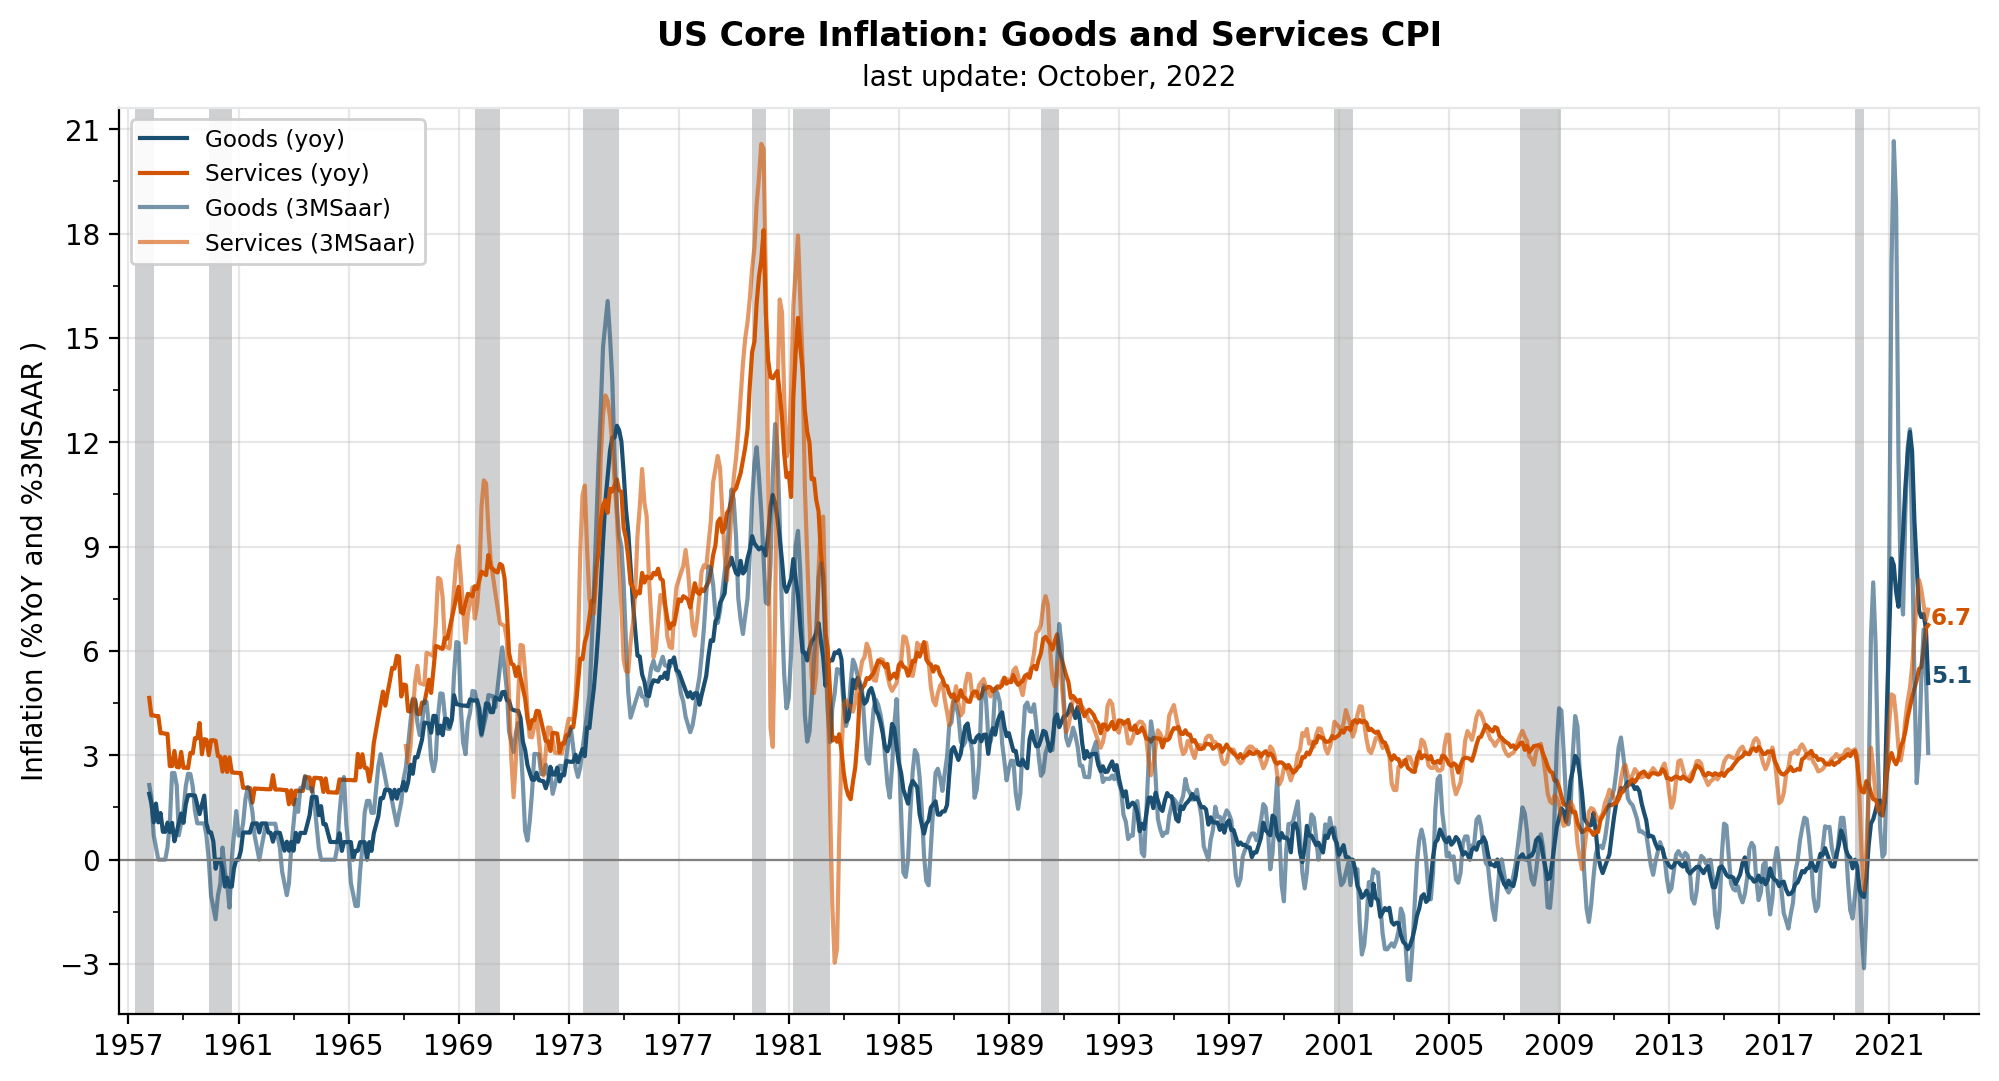

In [39]:
df_code = pd.DataFrame({
    'series_id': ['Goods (yoy)','Services (yoy)','Goods (3MSaar)','Services (3MSaar)'],
    'hue': [colors[0], colors[1], colors[0], colors[1]],
    'alpha':[1, 1, 0.6, 0.6],
    'annotation':[True, True, False, False]})

fig, ax = ts_plot(df = pd.concat([core_nsa, core_sa]),
                  df_map = df_code,
                  start_date = "1957-01-01",
                  title ='US Core Inflation: Goods and Services CPI',
                  ylab='Inflation (%YoY and %3MSAAR )',
                  plot_recession = True, plot_zero = True,
                  xmargin = 0.01, ymargin = 0.04,
                  y_major_loc = 3, y_minor_loc = 2,
                  x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n=680)

plt.show()

### Core Goods

In [40]:
# Goods Composition

# Apparel: CUUR0000SAA
# New vehicles: CUUR0000SETA01
# Used cars and trucks: CUUR0000SETA02

goods_contr = weights[weights["item_name"].isin(["Apparel","New vehicles","Used cars and trucks"])]

# total goods weights
goods_weight = (
    weights[weights["item_name"]=="Commodities less food and energy commodities"]
    [["date","weight"]].rename(columns={"weight":"total"}))

goods_contr = pd.merge(goods_contr,goods_weight, how="left", on="date")

# merge with series id
goods_contr= pd.merge(goods_contr,
                      metadata[metadata["seasonal"]=="U"][["series_id","item_name"]],
                      how="left", on = ["item_name"])

# now, merging with cpi data
goods_contr = (
    pd.merge(
        goods_contr,
        compute_change(cpi[cpi["series_id"].isin(["CUUR0000SAA","CUUR0000SETA01","CUUR0000SETA02"])],n = 12),
        how="left", on=["date","series_id"])
)
goods_contr.head()

,item_name,date,weight,total,series_id,value
0,Apparel,2012-03-01,3.527,19.773,CUUR0000SAA,4.923899
1,New vehicles,2012-03-01,3.197,19.773,CUUR0000SETA01,2.477637
2,Used cars and trucks,2012-03-01,1.882,19.773,CUUR0000SETA02,3.196319
3,Apparel,2012-04-01,3.612,19.760,CUUR0000SAA,5.120842
4,New vehicles,2012-04-01,3.173,19.760,CUUR0000SETA01,2.163125


In [41]:
# weights, 12m moving averages
goods_contr["weight"] = (goods_contr
                         .sort_values("date")
                         .groupby('series_id')['weight']
                         .transform(lambda x: x.rolling(12,min_periods=1).mean())) 

goods_contr = goods_contr.dropna()

#calculating weights
goods_contr["value"] = (goods_contr["weight"]/goods_contr["total"]) * goods_contr["value"]

# reshaping data:
goods_contr = (
    pd.pivot_table(
        goods_contr[["date","item_name","value"]],
        values="value", columns="item_name", index="date")
    .reset_index()
    .rename_axis(None,axis=1)
)

goods_contr.head()

,date,Apparel,New vehicles,Used cars and trucks
0,2012-03-01,0.878298,0.400597,0.304227
1,2012-04-01,0.925043,0.348662,0.334632
2,2012-05-01,0.805398,0.215362,0.336439
3,2012-06-01,0.703711,0.147453,0.224446
4,2012-07-01,0.539805,0.133955,0.102833


In [42]:
# Goods YoY
goods_yoy = (
    core_nsa.loc[
        core_nsa["series_id"]=="Goods (yoy)",
        ["series_id","date","value"]]
    .rename(columns = {"value":"goods"})
)

goods_contr = pd.merge(goods_contr,goods_yoy[["date","goods"]], how="left", on="date")

goods_contr["Others"] = (
    goods_contr["goods"] -
    (goods_contr["Apparel"] + goods_contr["New vehicles"] + goods_contr["Used cars and trucks"])
)


# positive values
goods_contr_p = goods_contr.copy()
goods_contr_p.loc[goods_contr_p["Apparel"] < 0 ,"Apparel"] = 0
goods_contr_p.loc[goods_contr_p["New vehicles"] < 0 ,"New vehicles"] = 0
goods_contr_p.loc[goods_contr_p["Used cars and trucks"] < 0 ,"Used cars and trucks"] = 0
goods_contr_p.loc[goods_contr_p["Others"] < 0 ,"Others"] = 0

# test_negative values
goods_contr_n = goods_contr.copy()
goods_contr_n.loc[goods_contr_n["Apparel"] >= 0 ,"Apparel"] = 0
goods_contr_n.loc[goods_contr_n["New vehicles"] >= 0 ,"New vehicles"] = 0
goods_contr_n.loc[goods_contr_n["Used cars and trucks"] >= 0 ,"Used cars and trucks"] = 0
goods_contr_n.loc[goods_contr_n["Others"] >= 0 ,"Others"] = 0


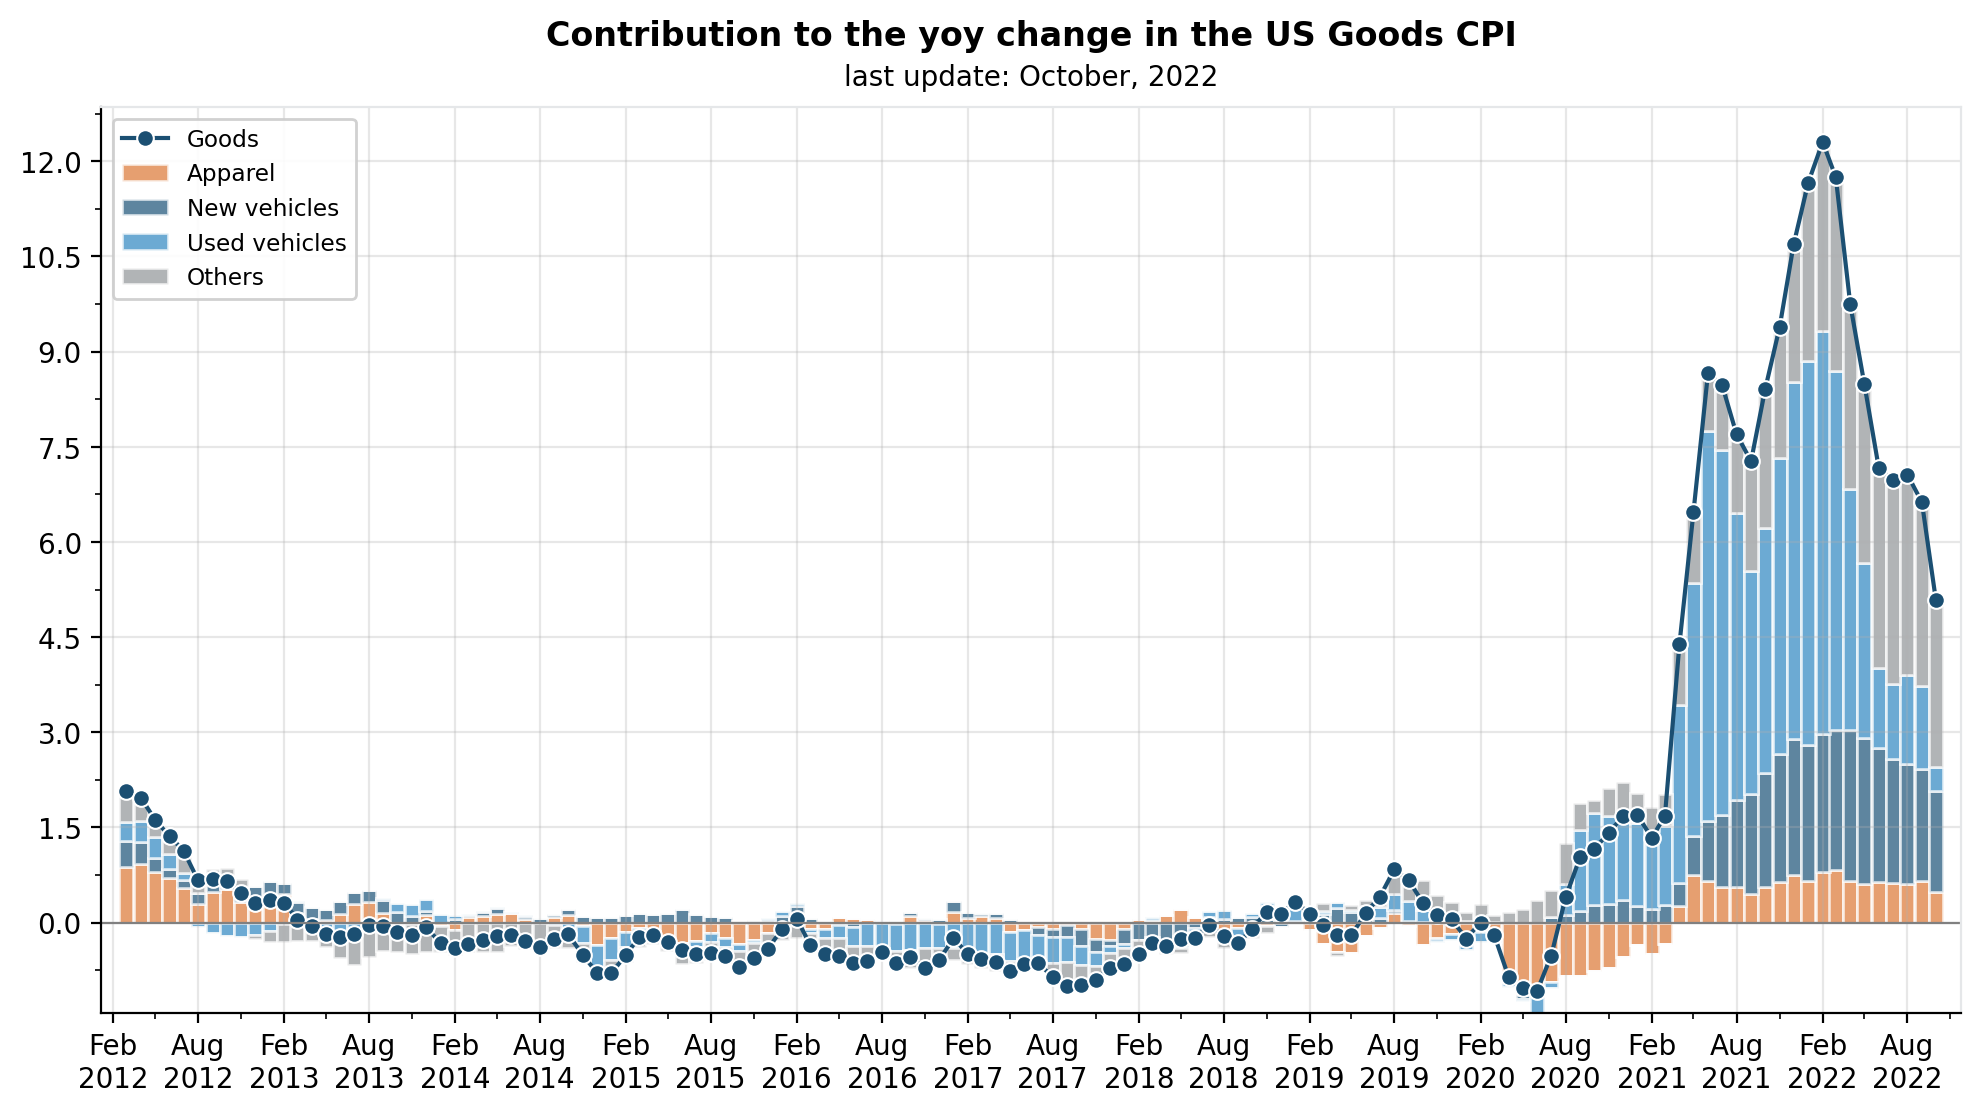

In [43]:
# chart:
fig, ax = plt.subplots(figsize=(12,6))

# positive values
ax.bar(goods_contr_p["date"], goods_contr_p["Apparel"], width = 30,
       label="Apparel", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_p["date"], goods_contr_p["New vehicles"], width = 30,
       bottom = goods_contr_p["Apparel"], label="New vehicles", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_p["date"], goods_contr_p["Used cars and trucks"], width = 30,
       bottom = goods_contr_p["Apparel"]+goods_contr_p["New vehicles"],
       label="Used vehicles", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_p["date"], goods_contr_p["Others"], width = 30,
       bottom = goods_contr_p["Apparel"]+goods_contr_p["New vehicles"]+
       goods_contr_p["Used cars and trucks"],
       label="Others", color= colors[102], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# negative values
ax.bar(goods_contr_n["date"], goods_contr_n["Apparel"], width = 30,
       label="Apparel", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_n["date"], goods_contr_n["New vehicles"], width = 30,
       bottom = goods_contr_n["Apparel"], label="New vehicles", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_n["date"], goods_contr_n["Used cars and trucks"], width = 30,
       bottom = goods_contr_n["Apparel"]+goods_contr_n["New vehicles"],
       label="Used vehicles", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(goods_contr_n["date"], goods_contr_n["Others"], width = 30,
       bottom = goods_contr_n["Apparel"]+goods_contr_n["New vehicles"]+
       goods_contr_n["Used cars and trucks"],
       label="Others", color= colors[102], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# line
sns.lineplot(data=goods_contr_p,
            x="date", y="goods",
            color=colors[0], ax=ax, legend=False, marker="o")

ax.legend(['Goods', 'Apparel', 'New vehicles', 'Used vehicles', 'Others'], 
    loc='upper left', frameon=True, framealpha=0.9, fontsize='small')


ax.axhline(y=0, color='gray', lw=0.8)

ax.margins(x=0.01, y=0.04)

# date axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

year_month_formatter = mdates.DateFormatter("%b\n%Y")
ax.xaxis.set_major_formatter(year_month_formatter)

# y axis
ax.yaxis.set_major_locator(MultipleLocator(1.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel(None)

ax.spines['top'].set_edgecolor(colors[107])
ax.spines['right'].set_edgecolor(colors[107])

ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', alpha=0.3)

ax.set_title('Contribution to the yoy change in the US Goods CPI', y=1.05, loc="center",
            fontweight="bold")

# subtitle...
last = goods_contr_p.loc[goods_contr_p['date']==max(goods_contr_p['date']),:]

ax.xaxis.set_label_position('top')
text = last["date"].dt.strftime("%B, %Y").values[0]

ax.set_xlabel(f"last update: {text}",
              labelpad = 8, loc="center")

plt.show()

### Used Vehicles

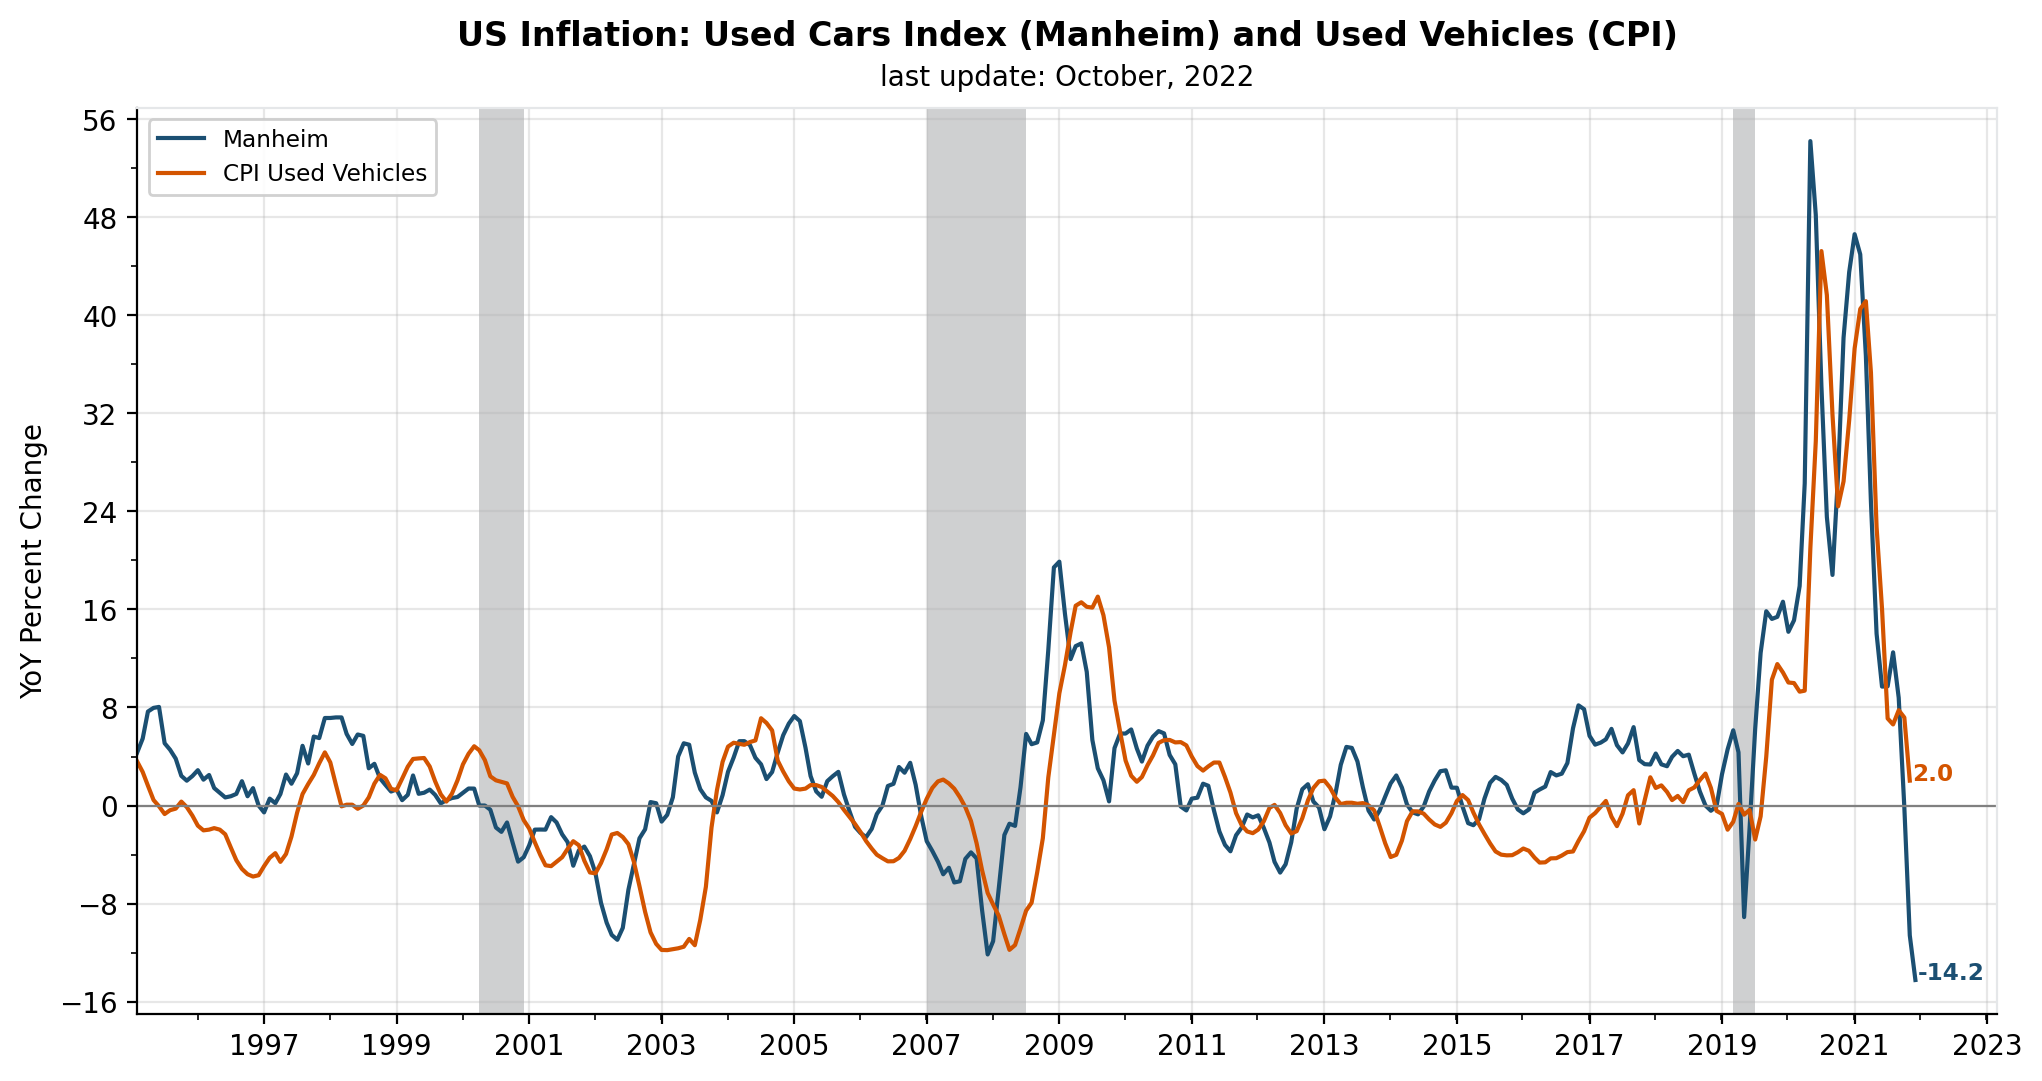

In [44]:
# Importing Manheim data
manheim = pd.read_csv("data\\inflation\\manheim.csv")
manheim["date"] = pd.to_datetime("01-" + manheim["date"])
manheim["series_id"] = "Manheim"
manheim = manheim.rename(columns = {"manheim":"value"})
manheim = compute_change(manheim[["series_id","date","value"]], n = 12)

# Goods YoY
used_vehicles_yoy = (
    compute_change(cpi[cpi["series_id"]=="CUUR0000SETA02"],n = 12)
    .replace("CUUR0000SETA02","CPI Used Vehicles"))

# chart
df_code = pd.DataFrame({
    'series_id': ['Manheim','CPI Used Vehicles'],
    'hue': [colors[0], colors[1]],
    'alpha':[1, 1],
    'annotation':[True, True]})

fig, ax = ts_plot(df = pd.concat([manheim, used_vehicles_yoy]),
                  df_map = df_code,
                  start_date = "1996-01-01",
                  title ='US Inflation: Used Cars Index (Manheim) and Used Vehicles (CPI)',
                  ylab='YoY Percent Change',
                  plot_recession = True, plot_zero = True,
                  xmargin = 0.01, ymargin = 0.04,
                  y_major_loc = 8, y_minor_loc = 2,
                  x_major_loc = 24, x_minor_loc = 2, x_format = "%Y", n=450)

plt.show()

### Core Services

In [45]:
# Item names:
# Shelter
# Medical care services
# Transportation services

services_contr = weights[weights["item_name"].isin(["Shelter","Medical care services","Transportation services"])]

# total goods weights
services_weight = (
    weights[weights["item_name"]=="Services less energy services"]
    [["date","weight"]].rename(columns={"weight":"total"})
)

services_contr = pd.merge(services_contr,services_weight, how="left", on="date")

# merge with series id
services_contr= pd.merge(services_contr,
                      metadata[metadata["seasonal"]=="U"][["series_id","item_name"]],
                      how="left", on = ["item_name"])

# now, merging with cpi data
services_contr = (
    pd.merge(
        services_contr,
        compute_change(cpi[cpi["series_id"].isin(["CUUR0000SAH1","CUUR0000SAM2","CUUR0000SAS4"])],n = 12),
        how="left", on=["date","series_id"])
)

services_contr.head()

,item_name,date,weight,total,series_id,value
0,Shelter,2012-03-01,31.413,55.949,CUUR0000SAH1,2.116975
1,Medical care services,2012-03-01,5.358,55.949,CUUR0000SAM2,3.533071
2,Transportation services,2012-03-01,5.739,55.949,CUUR0000SAS4,1.443277
3,Shelter,2012-04-01,31.259,55.679,CUUR0000SAH1,2.229613
4,Medical care services,2012-04-01,5.328,55.679,CUUR0000SAM2,3.660046


In [46]:
# weights, 12m moving averages
services_contr["weight"] = (services_contr
                         .sort_values("date")
                         .groupby('series_id')['weight']
                         .transform(lambda x: x.rolling(12,min_periods=1).mean())) 

services_contr = services_contr.dropna()

services_contr["value"] = (services_contr["weight"]/services_contr["total"]) * services_contr["value"]

# reshaping data:
services_contr = (
    pd.pivot_table(
        services_contr[["date","item_name","value"]],
        values="value", columns="item_name", index="date")
    .reset_index()
    .rename_axis(None,axis=1)
)

services_contr.head()

,date,Medical care services,Shelter,Transportation services
0,2012-03-01,0.338347,1.188592,0.148045
1,2012-04-01,0.351221,1.254821,0.175304
2,2012-05-01,0.370858,1.277932,0.195349
3,2012-06-01,0.412721,1.232986,0.181905
4,2012-07-01,0.416070,1.164865,0.160986


In [47]:
# services yoy, and changing the value column name
services_yoy = (
    core_nsa.loc[
        core_nsa["series_id"]=="Services (yoy)",
        ["series_id","date","value"]]
    .rename(columns = {"value":"services"}))

# merging services yoy with the DF
services_contr = pd.merge(
    services_contr,
    services_yoy[["date","services"]],
    how="left",on="date")

# creating "others"
services_contr["Others"] = (
    services_contr["services"] - 
    (services_contr["Shelter"] +
     services_contr["Medical care services"] +
     services_contr["Transportation services"])
)

# _positive
services_contr_p = services_contr.copy()
services_contr_p.loc[services_contr_p["Shelter"] < 0 ,"Shelter"] = 0
services_contr_p.loc[services_contr_p["Medical care services"] < 0 ,"Medical care services"] = 0
services_contr_p.loc[services_contr_p["Transportation services"] < 0 ,"Transportation services"] = 0
services_contr_p.loc[services_contr_p["Others"] < 0 ,"Others"] = 0

# _negative
services_contr_n = services_contr.copy()
services_contr_n.loc[services_contr_n["Shelter"] >= 0 ,"Shelter"] = 0
services_contr_n.loc[services_contr_n["Medical care services"] >= 0 ,"Medical care services"] = 0
services_contr_n.loc[services_contr_n["Transportation services"] >= 0 ,"Transportation services"] = 0
services_contr_n.loc[services_contr_n["Others"] >= 0 ,"Others"] = 0

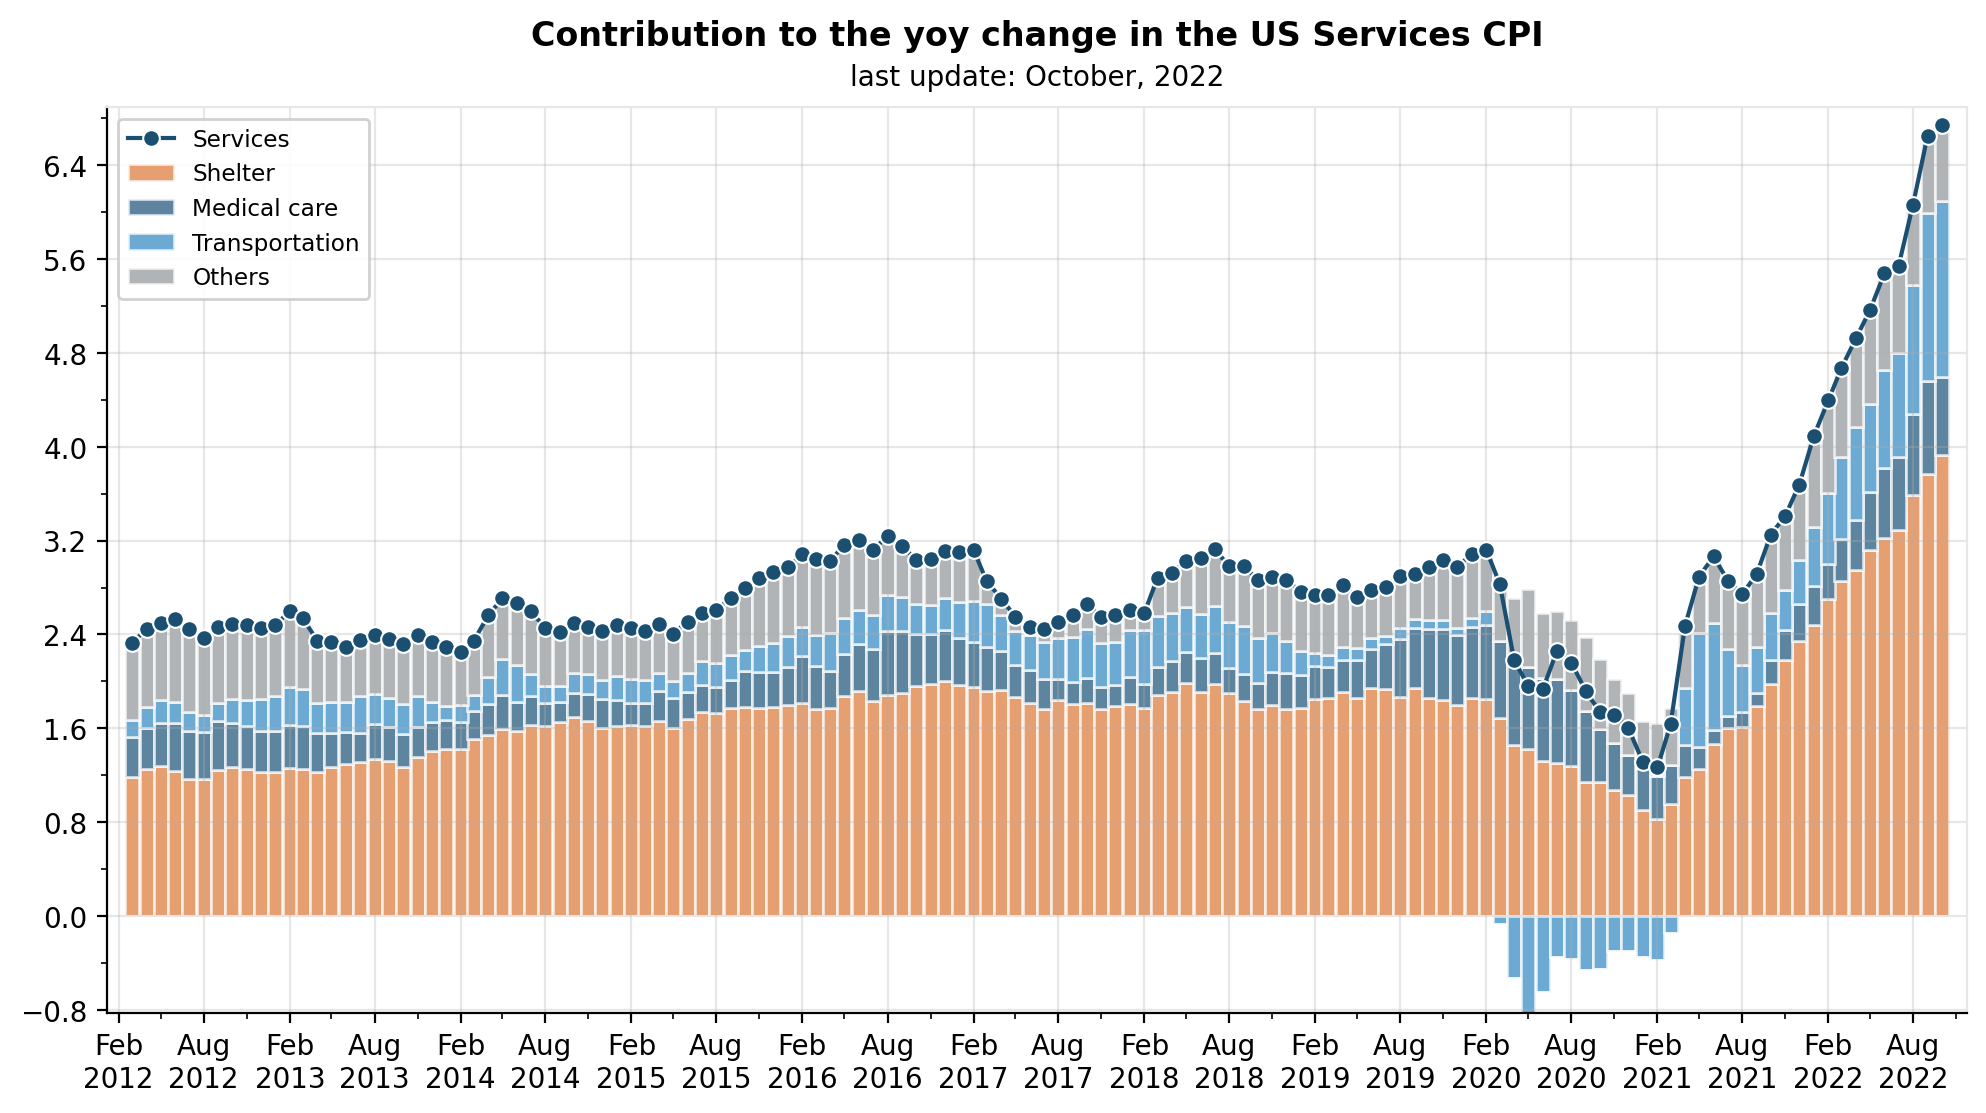

In [48]:
# chart:
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots(figsize=(12,6))

# positive values
ax.bar(services_contr_p["date"], services_contr_p["Shelter"], width = 30,
       label="Shelter", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_p["date"], services_contr_p["Medical care services"], width = 30,
       bottom = services_contr_p["Shelter"], label="Medical care", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_p["date"], services_contr_p["Transportation services"], width = 30,
       bottom = services_contr_p["Shelter"]+services_contr_p["Medical care services"],
       label="Transportation", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_p["date"], services_contr_p["Others"], width = 30,
       bottom = services_contr_p["Shelter"]+services_contr_p["Medical care services"]+
       services_contr_p["Transportation services"],
       label="Others", color= colors[102], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# negative values
ax.bar(services_contr_n["date"], services_contr_n["Shelter"], width = 30,
       label="Shelter", color= colors[75], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_n["date"], services_contr_n["Medical care services"], width = 30,
       bottom = services_contr_n["Shelter"], label="Medical care", color= colors[31], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_n["date"], services_contr_n["Transportation services"], width = 30,
       bottom = services_contr_n["Shelter"]+services_contr_n["Medical care services"],
       label="Transportation", color= colors[43], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

ax.bar(services_contr_n["date"], services_contr_n["Others"], width = 30,
       bottom = services_contr_n["Shelter"]+services_contr_n["Medical care services"]+
       services_contr_n["Transportation services"],
       label="Others", color= colors[102], alpha=0.7,
       edgecolor = 'white', linewidth = 1)

# line
sns.lineplot(data=services_contr_p,
            x="date", y="services",
            color=colors[0], ax=ax, legend=False, marker="o")

ax.legend(['Services', 'Shelter','Medical care', 'Transportation','Others'], 
    loc='upper left', frameon=True, framealpha=0.9, fontsize='small')

ax.margins(x=0.01, y=0.02)

# date axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

year_month_formatter = mdates.DateFormatter("%b\n%Y")
ax.xaxis.set_major_formatter(year_month_formatter)

# y axis
ax.yaxis.set_major_locator(MultipleLocator(0.8))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel(None)

ax.spines['top'].set_edgecolor(colors[107])
ax.spines['right'].set_edgecolor(colors[107])

ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', alpha=0.3)

ax.set_title('Contribution to the yoy change in the US Services CPI', y=1.05, loc="center",
            fontweight="bold")

# subtitle...
last = services_contr_p.loc[services_contr_p['date']==max(services_contr_p['date']),:]

ax.xaxis.set_label_position('top')
text = last["date"].dt.strftime("%B, %Y").values[0]

ax.set_xlabel(f"last update: {text}",
              labelpad = 8, loc="center")

plt.show()

### Shelter: Owners' Equivalent Rent (OER)

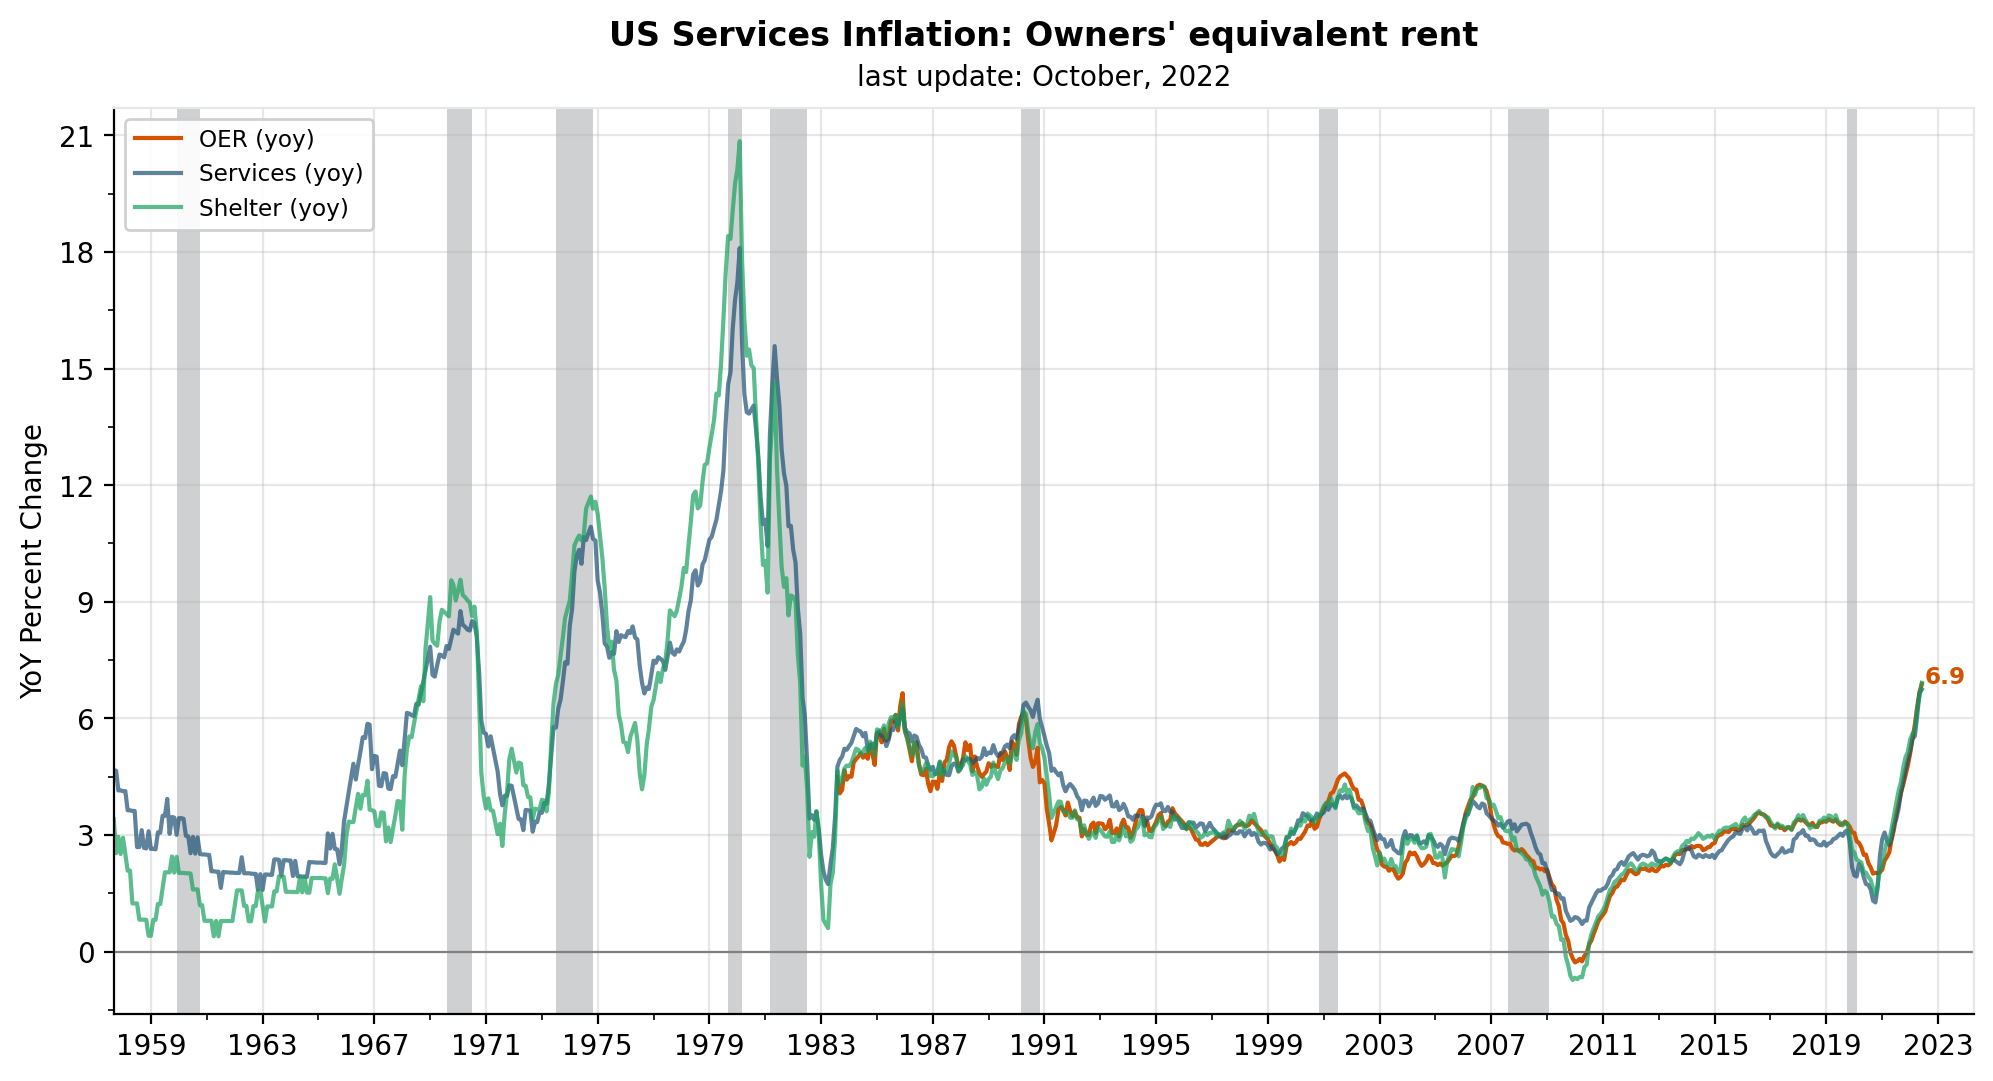

In [49]:
# Item name: Owners' equivalent rent of residences/ Shelter/ Services
# Codes:
# Seasonal: CUSR0000SEHC/ CUSR0000SAH1/ CUSR0000SASLE
# NSA: CUUR0000SEHC/ CUUR0000SAH1/ CUUR0000SASLE

# Select data
oer_nsa = cpi[cpi["series_id"].isin(["CUUR0000SEHC","CUUR0000SAH1","CUUR0000SASLE"])].copy()
oer_sa = cpi[cpi["series_id"].isin(["CUSR0000SEHC","CUSR0000SAH1","CUSR0000SASLE"])].copy()

# YoY
oer_nsa = (
    compute_change(oer_nsa, n = 12).
    replace(["CUUR0000SEHC","CUUR0000SAH1","CUUR0000SASLE"],
            ["OER (yoy)","Shelter (yoy)","Services (yoy)"])
)

# 3MSAAR
oer_sa = (
    saar(oer_sa, n = 3)
    .replace(["CUSR0000SEHC","CUSR0000SAH1","CUSR0000SASLE"],
             ["OER (3MSaar)", "Shelter (3MSaar)", "Services (3MSaar)"])
)

# Map DF:
df_code = pd.DataFrame({
    'series_id': ['OER (yoy)', 'Services (yoy)', 'Shelter (yoy)'],
    'hue': [colors[1], colors[0], colors[2]],
    'alpha':[1, 0.7, 0.7],
    'annotation':[True, False, False]})

fig, ax = ts_plot(df = oer_nsa,
                  df_map = df_code,
                  start_date = "1958-01-01",
                  title ="US Services Inflation: Owners' equivalent rent",
                  ylab='YoY Percent Change',
                  plot_recession = True, plot_zero = True,
                  xmargin = 0.01, ymargin = 0.04,
                  y_major_loc = 3, y_minor_loc = 2,
                  x_major_loc = 48, x_minor_loc = 2, x_format = "%Y", n=680)

plt.show()


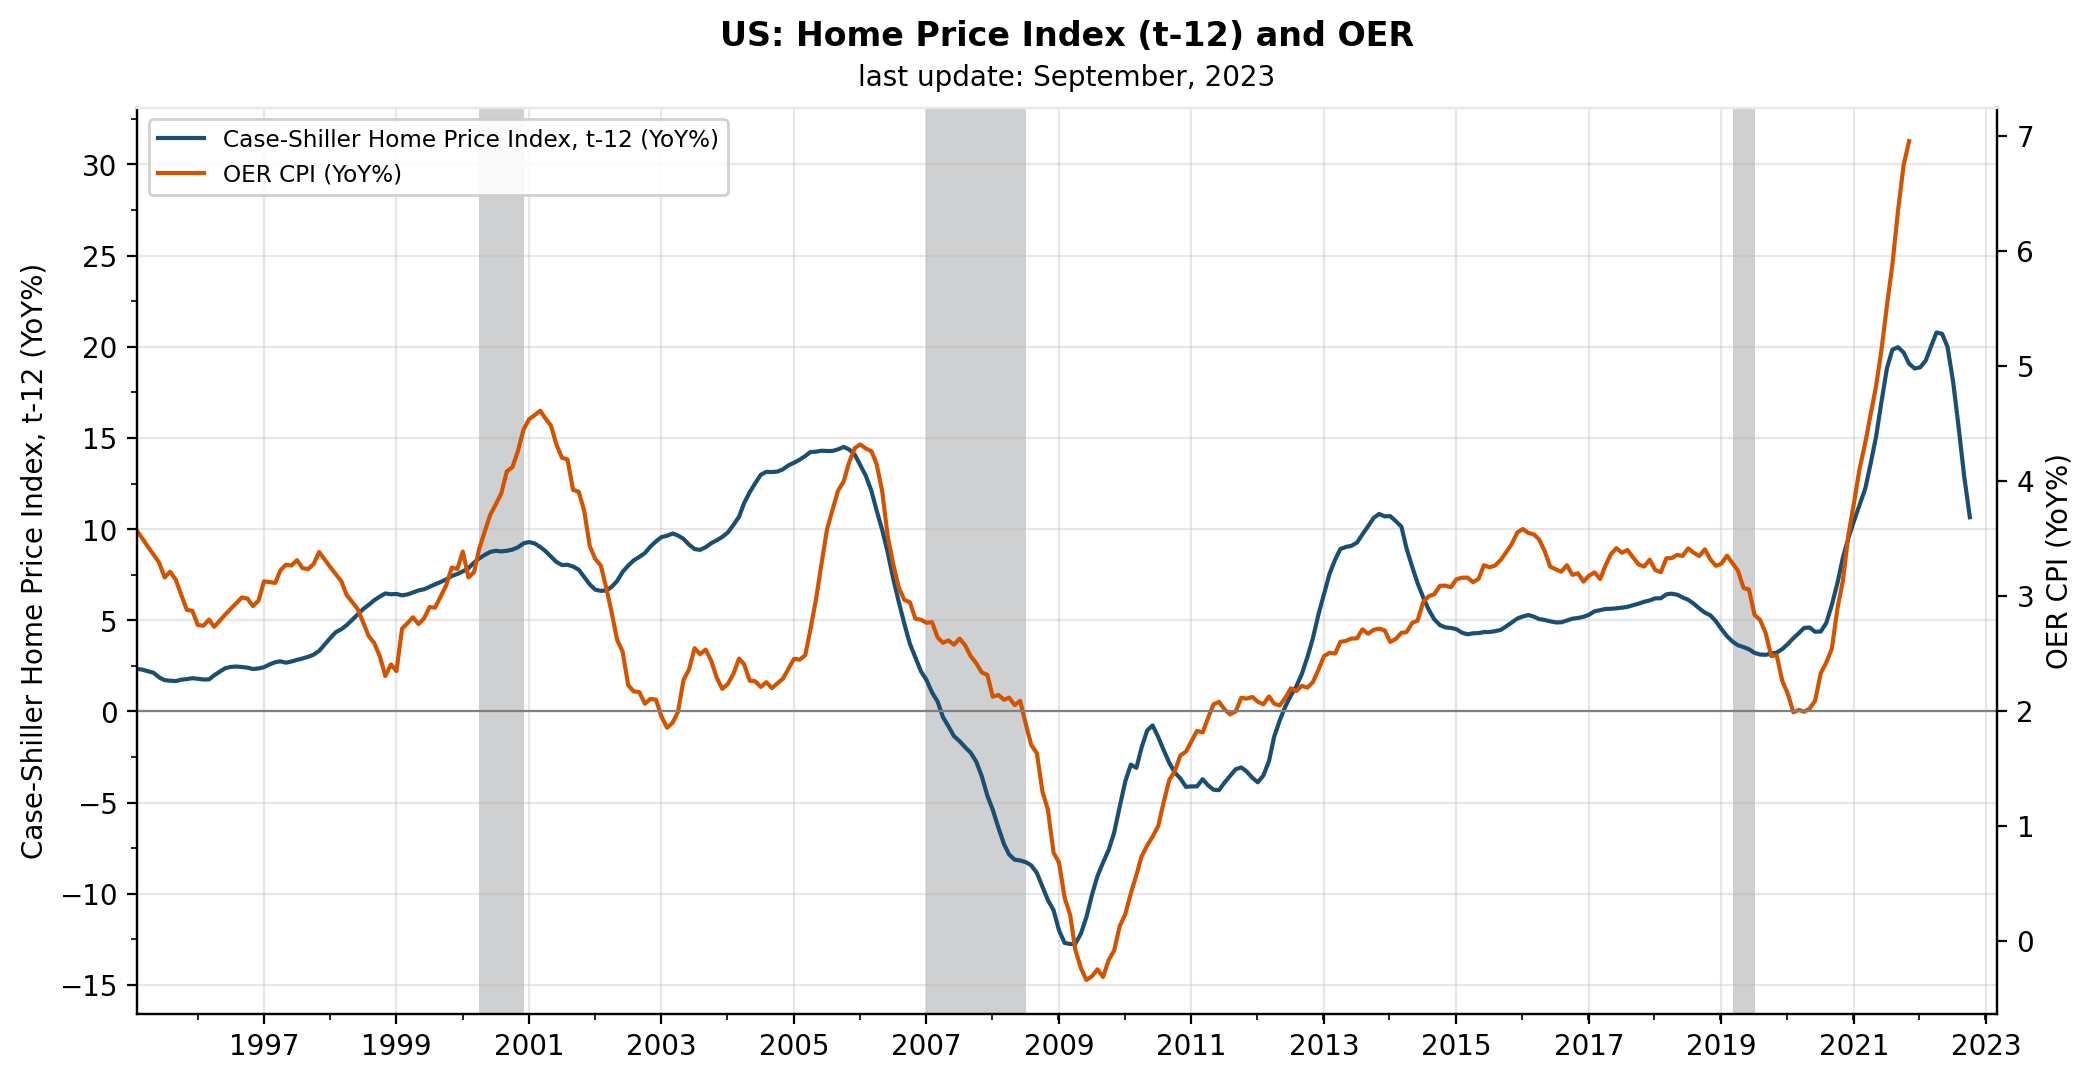

In [50]:
## OER and Home Prices:
# importing Case-Shiller Home price index:
cs = pd.read_parquet("data\\housing\\data_fred_caseshiller.parquet")

# computing YoY
cs_yoy = (compute_change(cs.loc[cs["series_id"]=="CSUSHPINSA", ["series_id","date","value"]], n = 12)
          .replace("CSUSHPINSA","Case-Shiller (yoy)"))

# using 12 months lead home prices
cs_yoy["date"] = cs_yoy["date"] + pd.DateOffset(months=12)


# chart:
fig, ax = dual_ts_plot(df = pd.concat([cs_yoy, oer_nsa]),
                       series1 = "Case-Shiller (yoy)", series2 = "OER (yoy)",
                       start_date = "1996-01-01",
                       title = "US: Home Price Index (t-12) and OER",
                       ly_label = "Case-Shiller Home Price Index, t-12 (YoY%)",
                       ry_label = "OER CPI (YoY%)",
                       fig_size = (12,6), legend_loc = "upper left",
                       plot_recession = True, plot_zero = True,
                       xmargin = 0.01, ymargin = 0.04,
                       y_major_loc = 5, y_minor_loc = 2,
                       x_major_loc = 24, x_minor_loc = 2, x_format = "%Y", n = 150)

plt.show()